# PART A. Review of Previous Individual Assignment
First part is a look at the previous assignment- a refresher of what we focused on Eviction Lab dataset for all Races in Los Angeles Country from 2000 to 2018. The goal of this assignment is to improve on the previous assignment that is to look at Eviction dataset for 2023 and do some analysis and create folium/interactive maps. 

In [2]:
#Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import statsmodels.api as sm
sns.set()
import warnings # supress warnings
warnings.filterwarnings('ignore')

We load the dataset for evictions so we can take a look at our variables and values of the Eviction Lab dataset for all Races in Los Angeles Country from 2000 to 2018

In [11]:
#actual file path for eviction dataset
df1=pd.read_csv('group01/eviction.csv')
df1.head(3)

,GEOID,name,parent-location,year,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,households-threatened-rate,households-threatened-rate-lower,households-threatened-rate-upper,eviction-filings,filings-per-day,eviction-filings-lower,eviction-filings-upper,eviction-filing-rate,eviction-filing-rate-lower,eviction-filing-rate-upper
0,6037,Los Angeles County,California,2000,9519338,17.91,49.96,704,42189,209300,...,3.44,2.4,4.81,58548.93,159.97,40126.34,82745.78,3.58,2.46,5.06
1,6037,Los Angeles County,California,2001,9519338,17.91,49.88,704,42189,209300,...,3.83,2.7,5.28,66257.00,181.53,46630.93,92295.67,4.04,2.84,5.63
2,6037,Los Angeles County,California,2002,9519338,17.91,49.81,704,42189,209300,...,3.60,3.6,3.60,61973.00,169.79,61973.00,61973.00,3.76,3.76,3.76


In [4]:
#list the columns provided in the dataset
df1.columns.to_list()

['GEOID',
 'name',
 'parent-location',
 'year',
 'population',
 'poverty-rate',
 'pct-renter-occupied',
 'median-gross-rent',
 'median-household-income',
 'median-property-value',
 'rent-burden',
 'pct-white',
 'pct-af-am',
 'pct-hispanic',
 'pct-am-ind',
 'pct-asian',
 'pct-nh-pi',
 'pct-multiple',
 'pct-other',
 'households-threatened',
 'households-threatened-lower',
 'households-threatened-upper',
 'households-threatened-rate',
 'households-threatened-rate-lower',
 'households-threatened-rate-upper',
 'eviction-filings',
 'filings-per-day',
 'eviction-filings-lower',
 'eviction-filings-upper',
 'eviction-filing-rate',
 'eviction-filing-rate-lower',
 'eviction-filing-rate-upper']

# Exploratory Data Analysis
## Eviction filings distribution by year
We see a steep decline in eviction filings in Los Angeles from 2003-2006 and the numbers pick up in 2007 and peak in 2008 during the financial crisis. There has been a steady decline in filings from 2012 through 2018.

Text(0, 0.5, 'eviction filings')

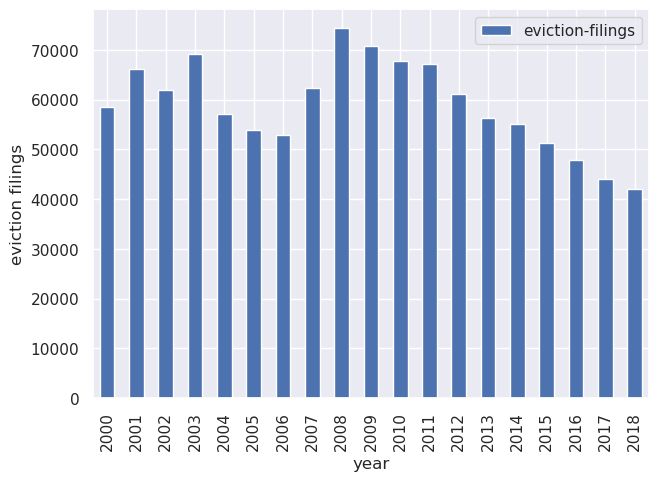

In [5]:
#Eviction filings distribution by year  
df1.plot.bar(x='year', y='eviction-filings')
plt.ylabel('eviction filings')

## Distribution of Eviction Filings by Race
The Hispanic race show the most filings across the timeline under review. The second race White is the second in filing rankings followed by Asian and the least is multiple races.

<Figure size 2000x1000 with 0 Axes>

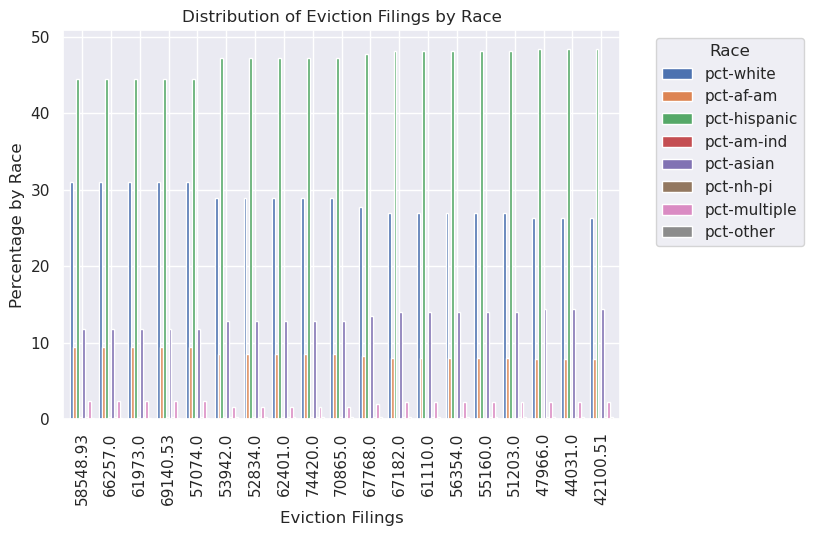

In [6]:
#Distribution of Eviction Filings by Race
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['eviction-filings'] + race_columns
df1_race = df1[columns_of_interest]

# Plot the data
plt.figure(figsize=(20, 10))
ax = df1_race.plot.bar(x='eviction-filings', y=race_columns, width=0.8)

# Move the legend outside the plot to the right
ax.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

#Label the plot
plt.title('Distribution of Eviction Filings by Race')
plt.xlabel('Eviction Filings')
plt.ylabel('Percentage by Race')
plt.show()

<Figure size 1200x800 with 0 Axes>

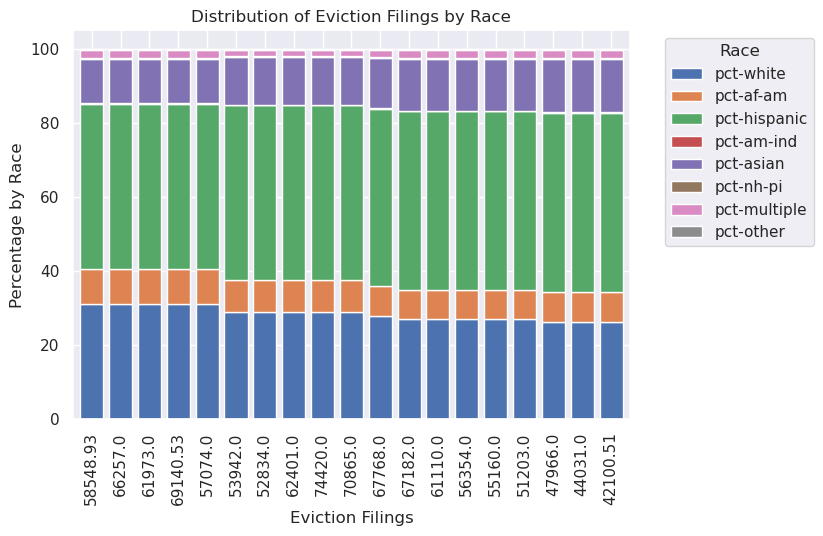

In [7]:
#Distribution of Eviction Filings by Race
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['eviction-filings'] + race_columns
df1_race = df1[columns_of_interest]

# Plot the data
plt.figure(figsize=(12, 8))
ax = df1_race.plot.bar(x='eviction-filings', y=race_columns, stacked=True, width=0.8)

# Move the legend outside the plot to the right
ax.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Eviction Filings by Race')
plt.xlabel('Eviction Filings')
plt.ylabel('Percentage by Race')
plt.show()

## Distribution of Eviction Filings by Race Over the Years
The analysis show that the Hispanic trend over the years kept going up compared to other races with a flattening curve over the same timeline.

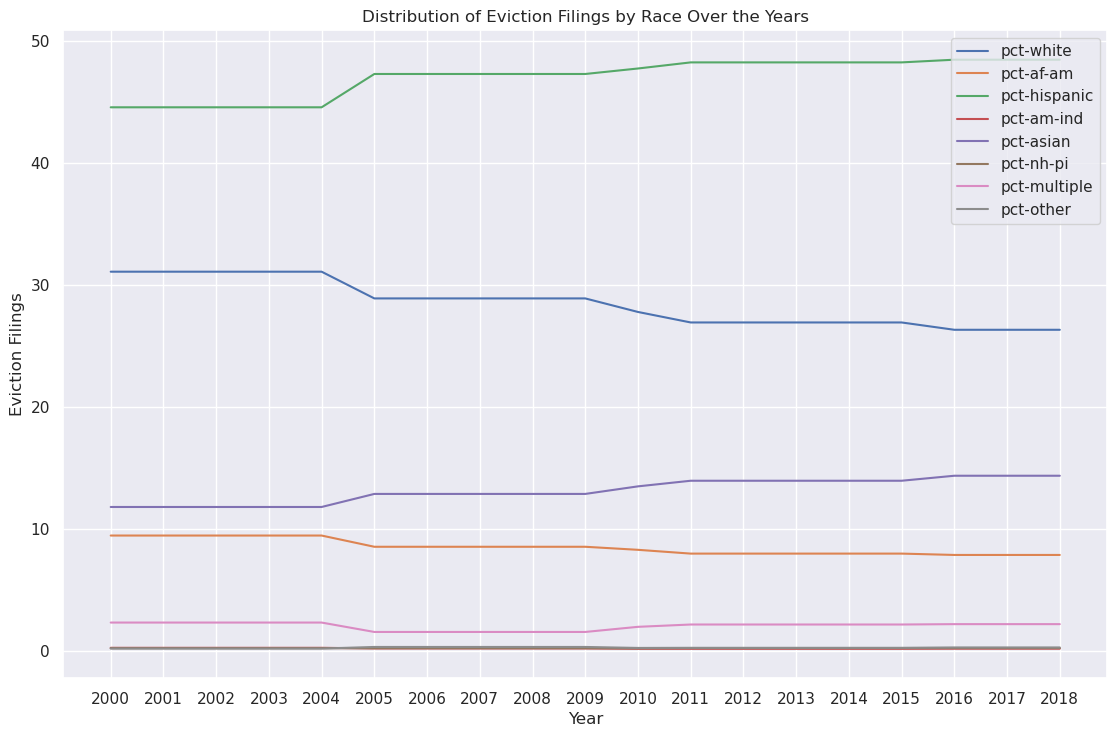

In [8]:
#Distribution of Eviction Filings by Race Over the Years
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['year', 'eviction-filings'] + race_columns
df1_race = df1[columns_of_interest]

# Convert 'year' column to integers
df1_race['year'] = df1_race['year'].astype(int)

# Group by year and sum the eviction filings for each race
df1_race_grouped = df1_race.groupby('year')[race_columns].sum()

# Plot the data
plt.figure(figsize=(12, 8))
for race in race_columns:
    plt.plot(df1_race_grouped.index, df1_race_grouped[race], label=race)

plt.title('Distribution of Eviction Filings by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Eviction Filings')
plt.legend()

# Set integer ticks on the x-axis
plt.xticks(range(2000, 2019))

plt.show()

## Eviction Filing Rate Distribution by Year
Distribution of rates show a sharp decline after the 2008 financial crisis and have maintined the trend through covid times 2019-2022 as shown in our research thats when numbers started picking up again.

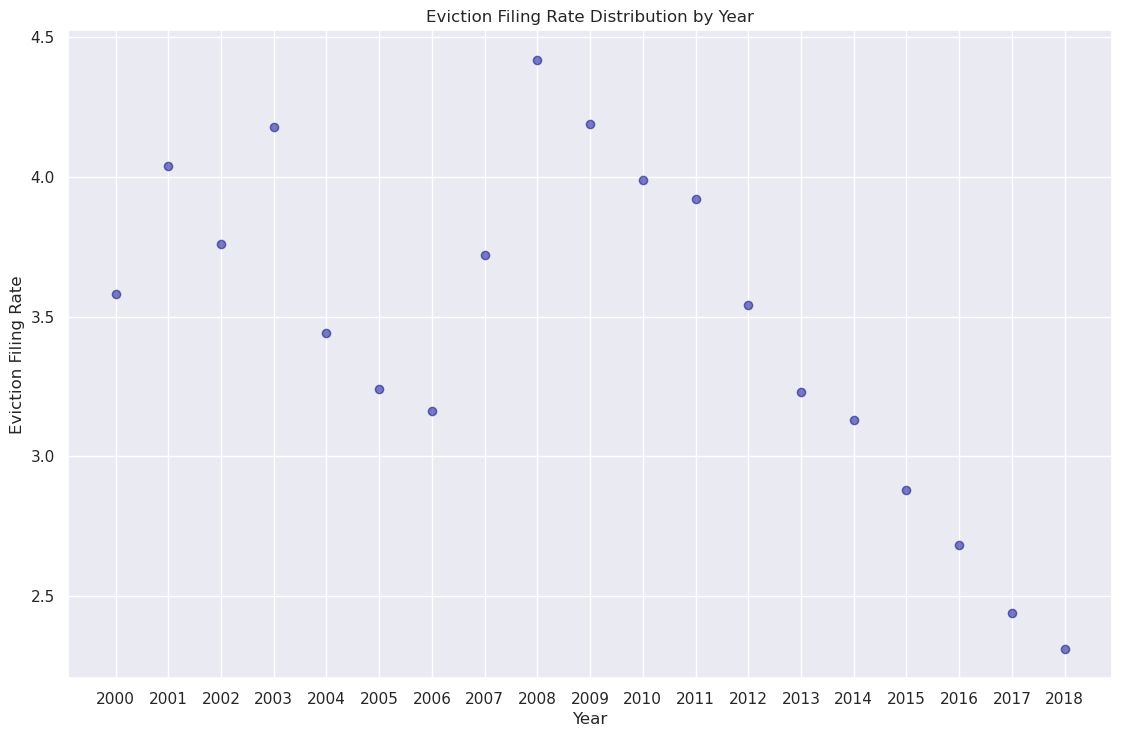

In [9]:
# Eviction filing rate distribution by year 
# Plot the data as a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df1['year'], df1['eviction-filing-rate'], color='darkblue', alpha=0.5)
plt.title('Eviction Filing Rate Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Eviction Filing Rate')
plt.grid(True)

# Set integer ticks on the x-axis
plt.xticks(range(2000, 2019))

plt.show()

## Distribution of Eviction Filing Rate by Race over the Years
We show the same results as our evecting filings column that during 2004-2005 Hispanic and Asians show an uptrend curve when other races were showing a decline in numbers.

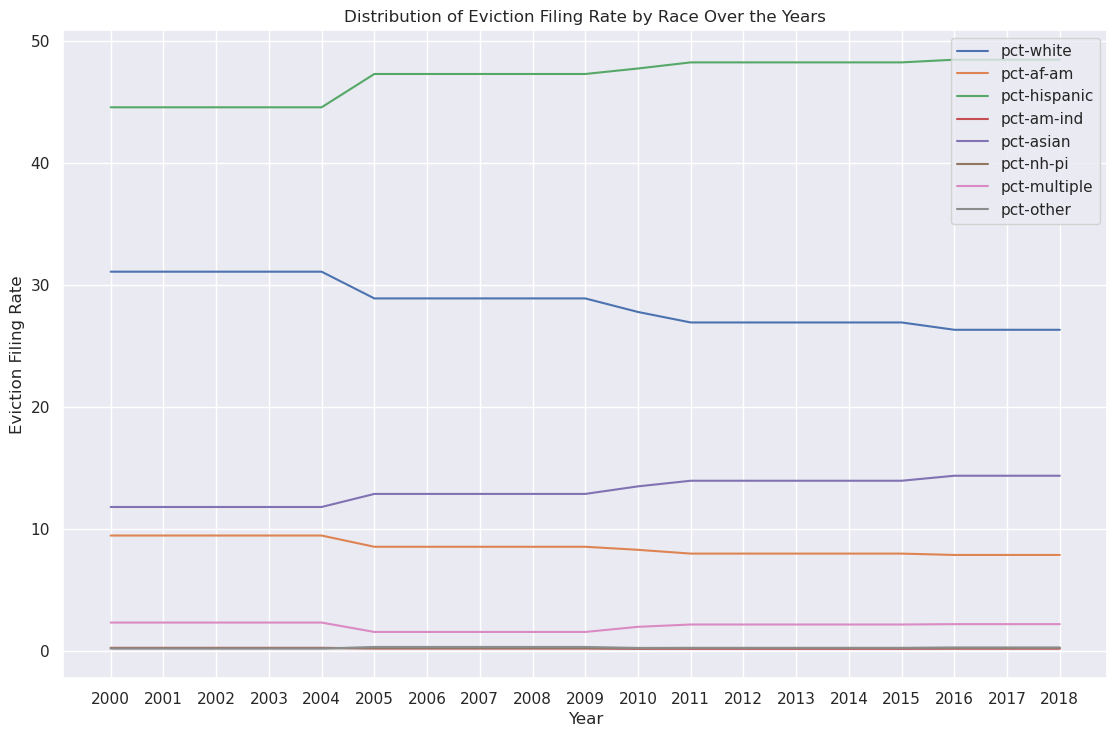

In [10]:
#Distribution of Eviction Filing Rate by Race over the Years 
# Select relevant columns
race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['year', 'eviction-filing-rate'] + race_columns
df1_race = df1[columns_of_interest]

# Convert 'year' column to integers
df1_race['year'] = df1_race['year'].astype(int)

# Group by year and find the average eviction filing rate for each race
df1_race_grouped = df1_race.groupby('year')[race_columns].mean()

# Plot the data
plt.figure(figsize=(12, 8))
for race in race_columns:
    plt.plot(df1_race_grouped.index, df1_race_grouped[race], label=race)

plt.title('Distribution of Eviction Filing Rate by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Eviction Filing Rate')
plt.legend()

# Set integer ticks on the x-axis
plt.xticks(df1_race_grouped.index)

plt.show()


## Population distribution changes over the years across Races
White and Hispanic have a higher share of eviction filings for the timeline 2000-2018

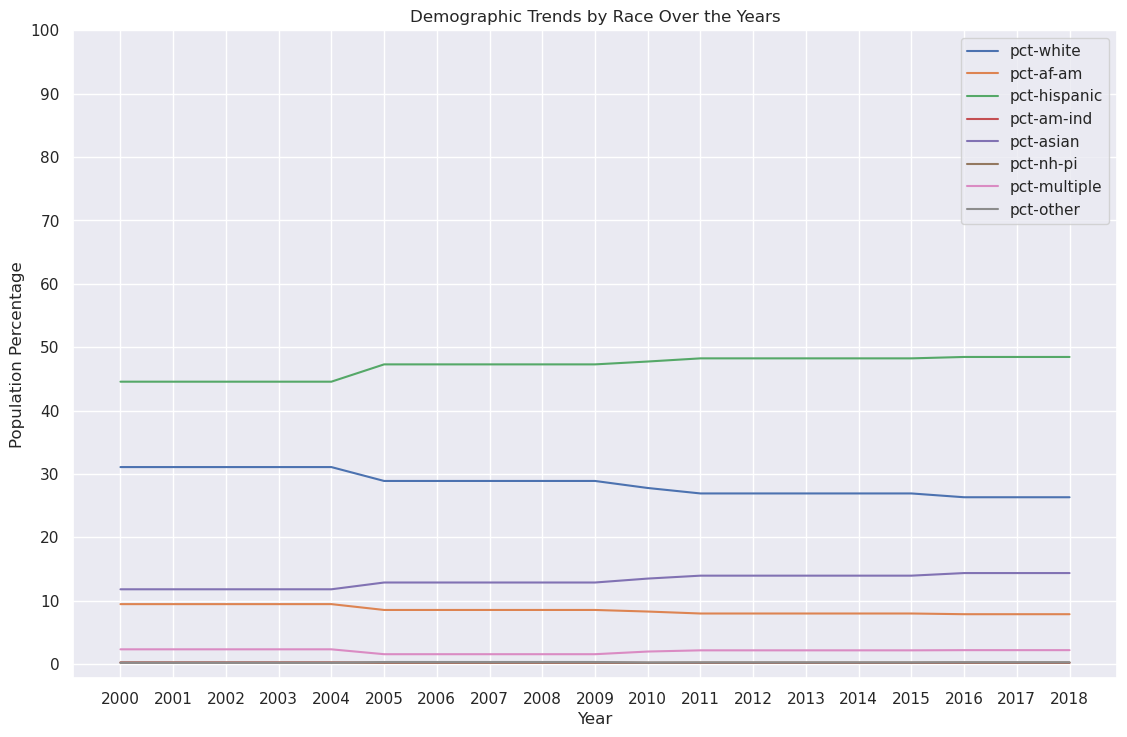

In [11]:
#Population distribution changes over the years across Races

race_columns = ['pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']
columns_of_interest = ['year', 'population'] + race_columns
df1_race_population = df1[columns_of_interest]

# Convert 'year' column to integers
df1_race_population['year'] = df1_race_population['year'].astype(int)

# Group by year and find the average population for each race
df1_race_population_grouped = df1_race_population.groupby('year')[race_columns].mean()

# Plot the data
plt.figure(figsize=(12, 8))
for race in race_columns:
    plt.plot(df1_race_population_grouped.index, df1_race_population_grouped[race], label=race)

plt.title('Demographic Trends by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Population Percentage')
plt.legend()

# Set integer ticks on the y-axis
plt.yticks(range(0, 101, 10))

# Set integer ticks on the x-axis for the years 2000-2018
plt.xticks(range(2000, 2019))

plt.show()


# PART B. WEEK 4 OPEN DATA FURTHER ANALYSIS USING 2023 DATASET 
Look at new dataset 2023 eviction dataset csv file. We geocode and geomerge with census tracts. 
We carry further analysis of key variables especially race.

We upload the dataset for Evictions Notices 2023

In [12]:
df_evictions = pd.read_csv('data/2023_Eviction_Notices.csv')
df_evictions.head(3)

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,Council District,Rent Owed
0,2/9/23,2/21/23,At-Fault,Non-payment of rent,14125 Garber St,Arleta,91331,NaN,3 Day,2642002018,6,"$12,701.70"
1,2/9/23,2/21/23,At-Fault,Non-payment of rent,14101 Garber St,Arleta,91331,NaN,3 Day,2642002014,6,"$17,886.60"
2,2/9/23,2/21/23,At-Fault,Non-payment of rent,14249 Hoyt St,Arleta,91331,NaN,3 Day,2644002011,6,"$6,218.17"


In [13]:
# check the data, specifically for the latitude and longitude columns. wE WILL USE THESE LAT AND LONG 
df_evictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77091 entries, 0 to 77090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Notice Date        77085 non-null  object 
 1   Date Received      77091 non-null  object 
 2   Eviction Category  77091 non-null  object 
 3   Cause              77089 non-null  object 
 4   Address            77091 non-null  object 
 5   City               77091 non-null  object 
 6   Zip                77091 non-null  int64  
 7   Bedroom            65224 non-null  float64
 8   Notice Type        77091 non-null  object 
 9   Apn                77091 non-null  int64  
 10  Council District   77091 non-null  int64  
 11  Rent Owed          77091 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 7.1+ MB


In [14]:
# look at the data types, verbose = True shows us all the counts
df_evictions.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77091 entries, 0 to 77090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Notice Date        77085 non-null  object 
 1   Date Received      77091 non-null  object 
 2   Eviction Category  77091 non-null  object 
 3   Cause              77089 non-null  object 
 4   Address            77091 non-null  object 
 5   City               77091 non-null  object 
 6   Zip                77091 non-null  int64  
 7   Bedroom            65224 non-null  float64
 8   Notice Type        77091 non-null  object 
 9   Apn                77091 non-null  int64  
 10  Council District   77091 non-null  int64  
 11  Rent Owed          77091 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 7.1+ MB


In [15]:
df_evictions.head(3)

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,Council District,Rent Owed
0,2/9/23,2/21/23,At-Fault,Non-payment of rent,14125 Garber St,Arleta,91331,NaN,3 Day,2642002018,6,"$12,701.70"
1,2/9/23,2/21/23,At-Fault,Non-payment of rent,14101 Garber St,Arleta,91331,NaN,3 Day,2642002014,6,"$17,886.60"
2,2/9/23,2/21/23,At-Fault,Non-payment of rent,14249 Hoyt St,Arleta,91331,NaN,3 Day,2644002011,6,"$6,218.17"


In [16]:
# axis = 0 drops rows axis = 1 drops columns with null
df_evictions = df_evictions.dropna(axis=1,how="all")

In [17]:
df_evictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77091 entries, 0 to 77090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Notice Date        77085 non-null  object 
 1   Date Received      77091 non-null  object 
 2   Eviction Category  77091 non-null  object 
 3   Cause              77089 non-null  object 
 4   Address            77091 non-null  object 
 5   City               77091 non-null  object 
 6   Zip                77091 non-null  int64  
 7   Bedroom            65224 non-null  float64
 8   Notice Type        77091 non-null  object 
 9   Apn                77091 non-null  int64  
 10  Council District   77091 non-null  int64  
 11  Rent Owed          77091 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 7.1+ MB


In [18]:
# reinspect the data
df_evictions.head(2)

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,Council District,Rent Owed
0,2/9/23,2/21/23,At-Fault,Non-payment of rent,14125 Garber St,Arleta,91331,NaN,3 Day,2642002018,6,"$12,701.70"
1,2/9/23,2/21/23,At-Fault,Non-payment of rent,14101 Garber St,Arleta,91331,NaN,3 Day,2642002014,6,"$17,886.60"


# Analysis of the 2023 Evictions Dataset

## Analysis of Evictions by Council District
Dictrict 14 and district 4 have the highest evictions numbers in 2023

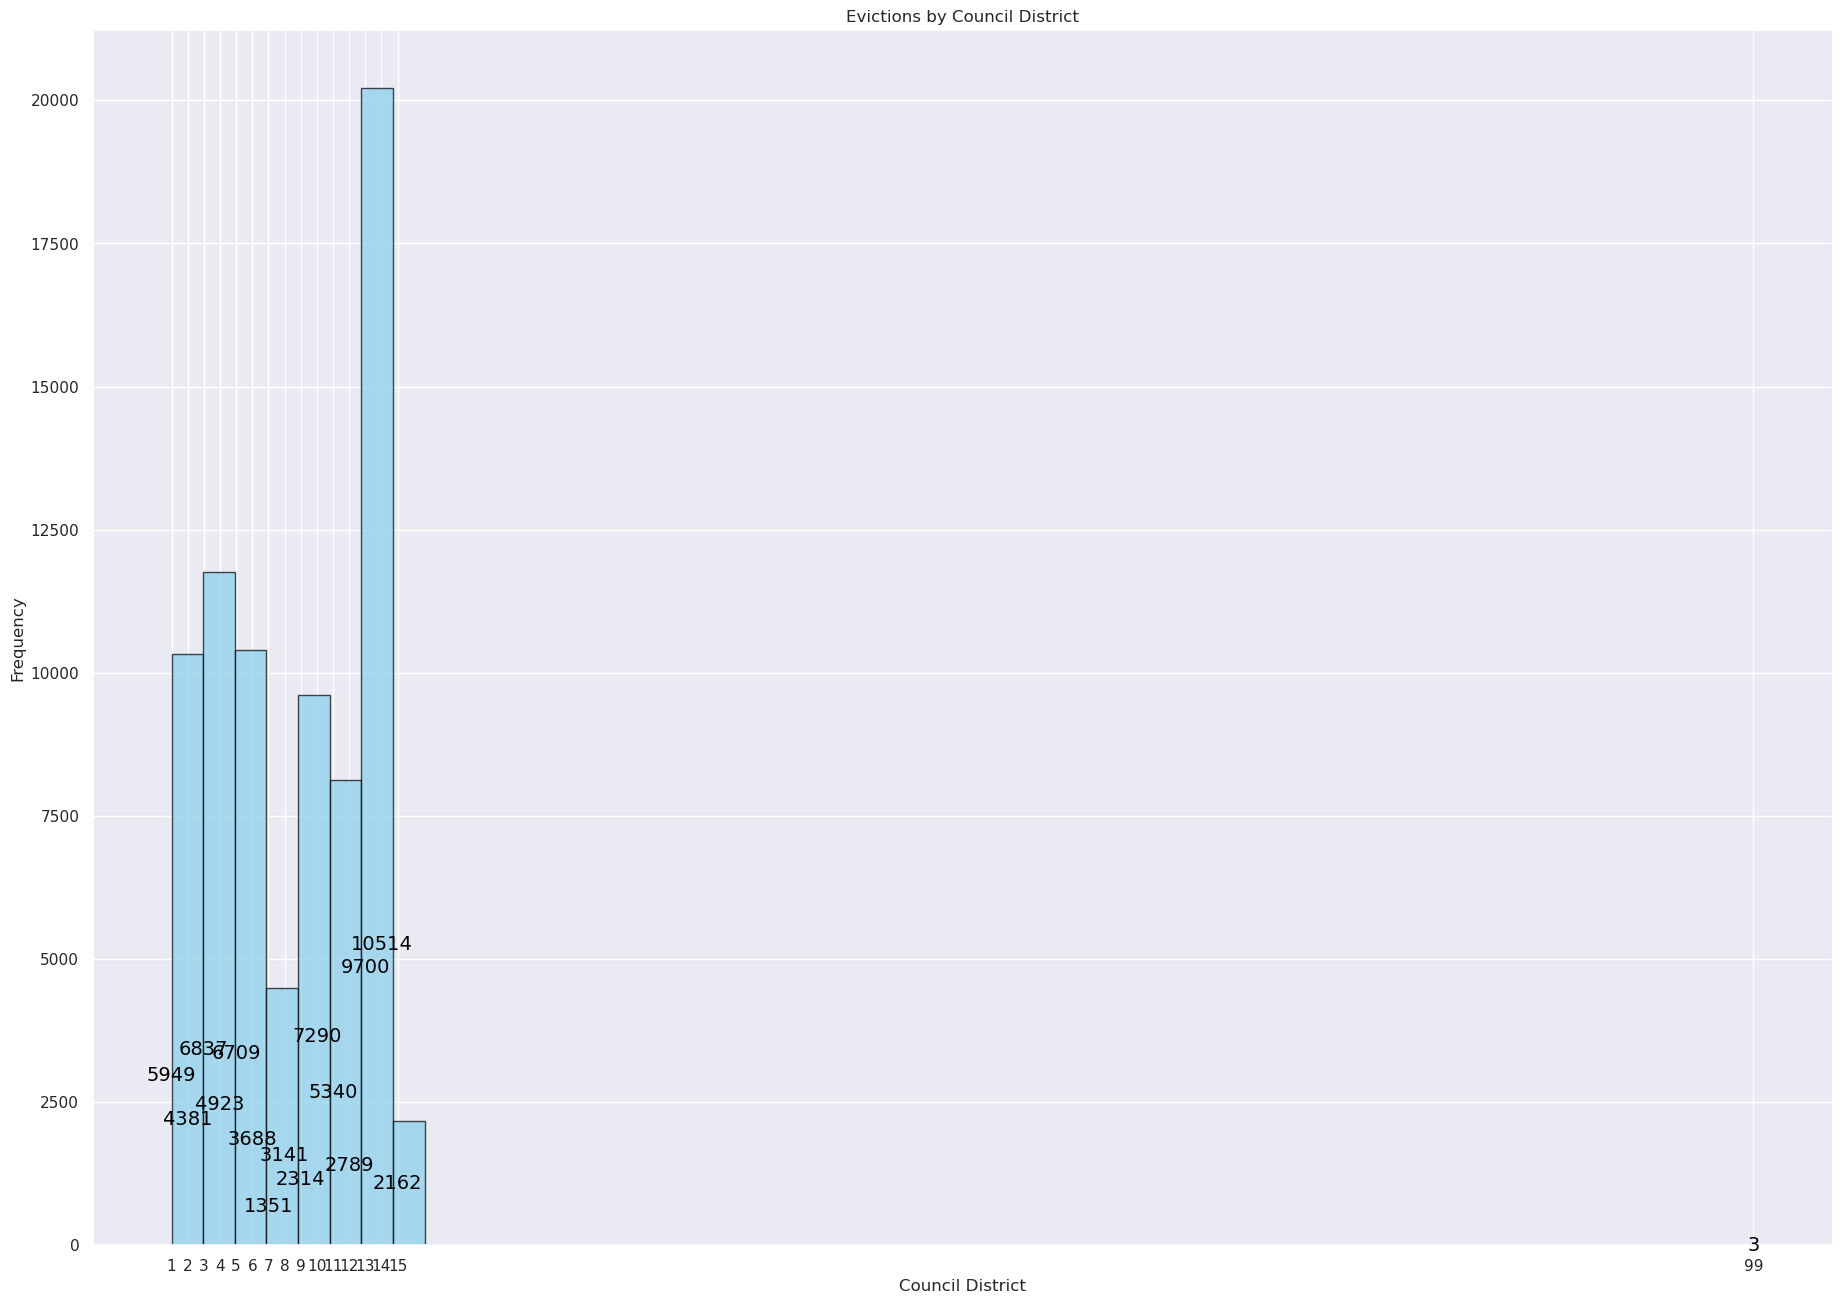

In [19]:
import matplotlib.pyplot as plt

#'Council District' is the column you want to plot
plt.figure(figsize=(20, 15))

# Plotting the histogram
ax = plt.hist(df_evictions['Council District'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Council District')
plt.ylabel('Frequency')
plt.title('Evictions by Council District')

# Adding labels to the x-axis (district numbers)
plt.xticks(df_evictions['Council District'].unique())

# Adding counts inside the bars
for district in df_evictions['Council District'].unique():
    plt.text(district, df_evictions["Council District"].value_counts()[district] / 2,
             f'{df_evictions["Council District"].value_counts()[district]}',
             ha='center', va='center', fontsize=14, color='black')

# Show the plot
plt.show()


## Analysis of Evictions by City 
We see that Los Angeles and Hollywood city have the highest eviction numbers in 2023

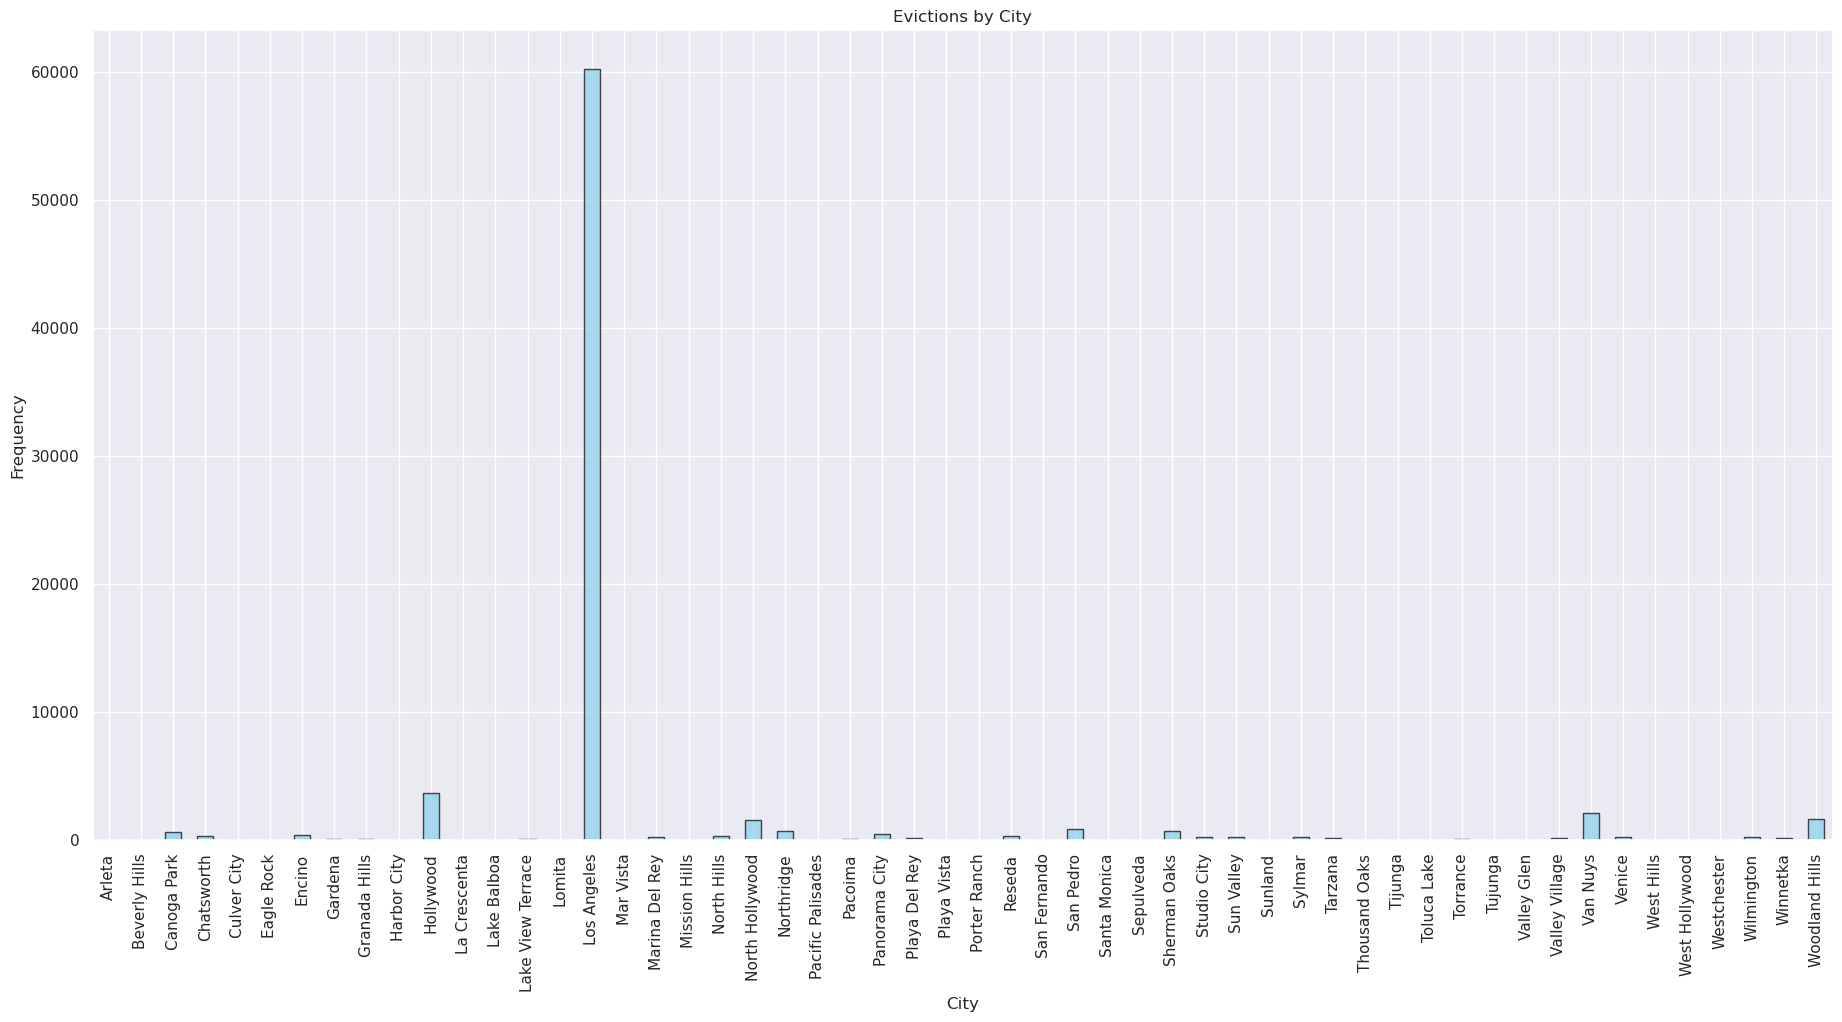

In [20]:
# City evictions count 
plt.figure(figsize=(20, 10))

# Plotting the bar chart
df_evictions['City'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Evictions by City')

# Show the plot
plt.show()


## Analysis of Evictions by Notice Type 
We notice that the 3day and 30day notice type are dominant eviction types in the dataset. 

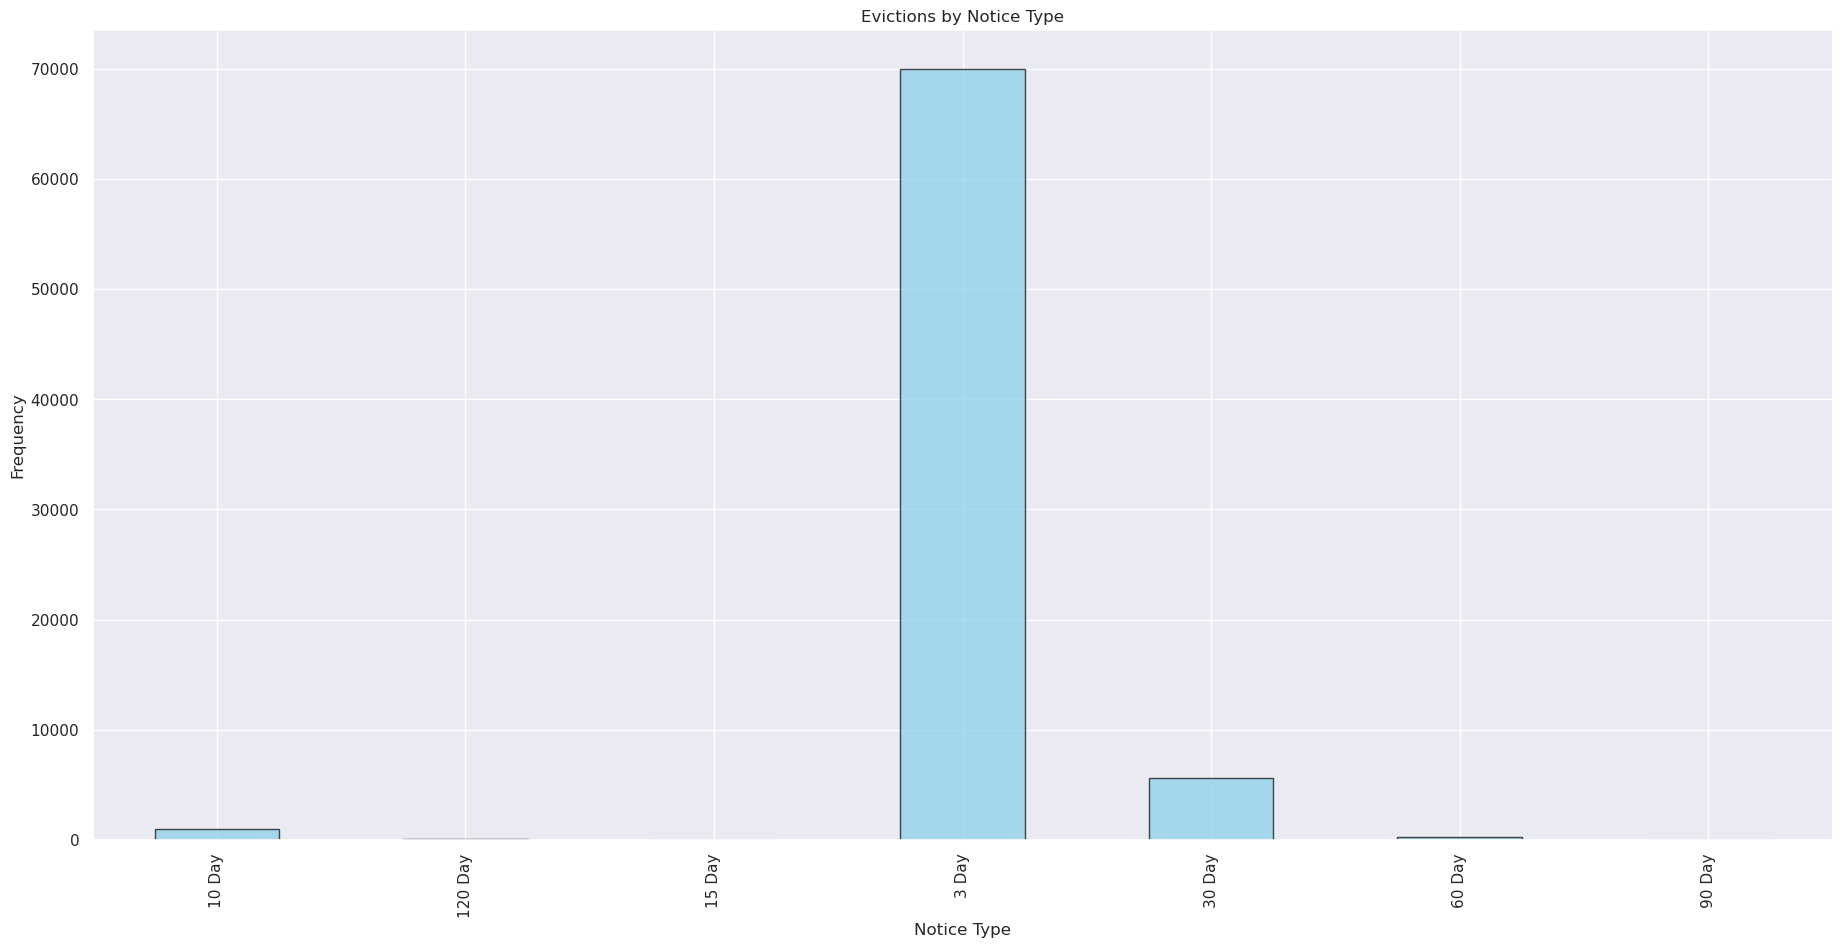

In [21]:
# City evictions count 
plt.figure(figsize=(20, 10))

# Plotting the bar chart
df_evictions['Notice Type'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Notice Type')
plt.ylabel('Frequency')
plt.title('Evictions by Notice Type')

# Show the plot
plt.show()

## Analysis of Evictions by Eviction Category 
We see At-Fault has the most eviction values for eviction category

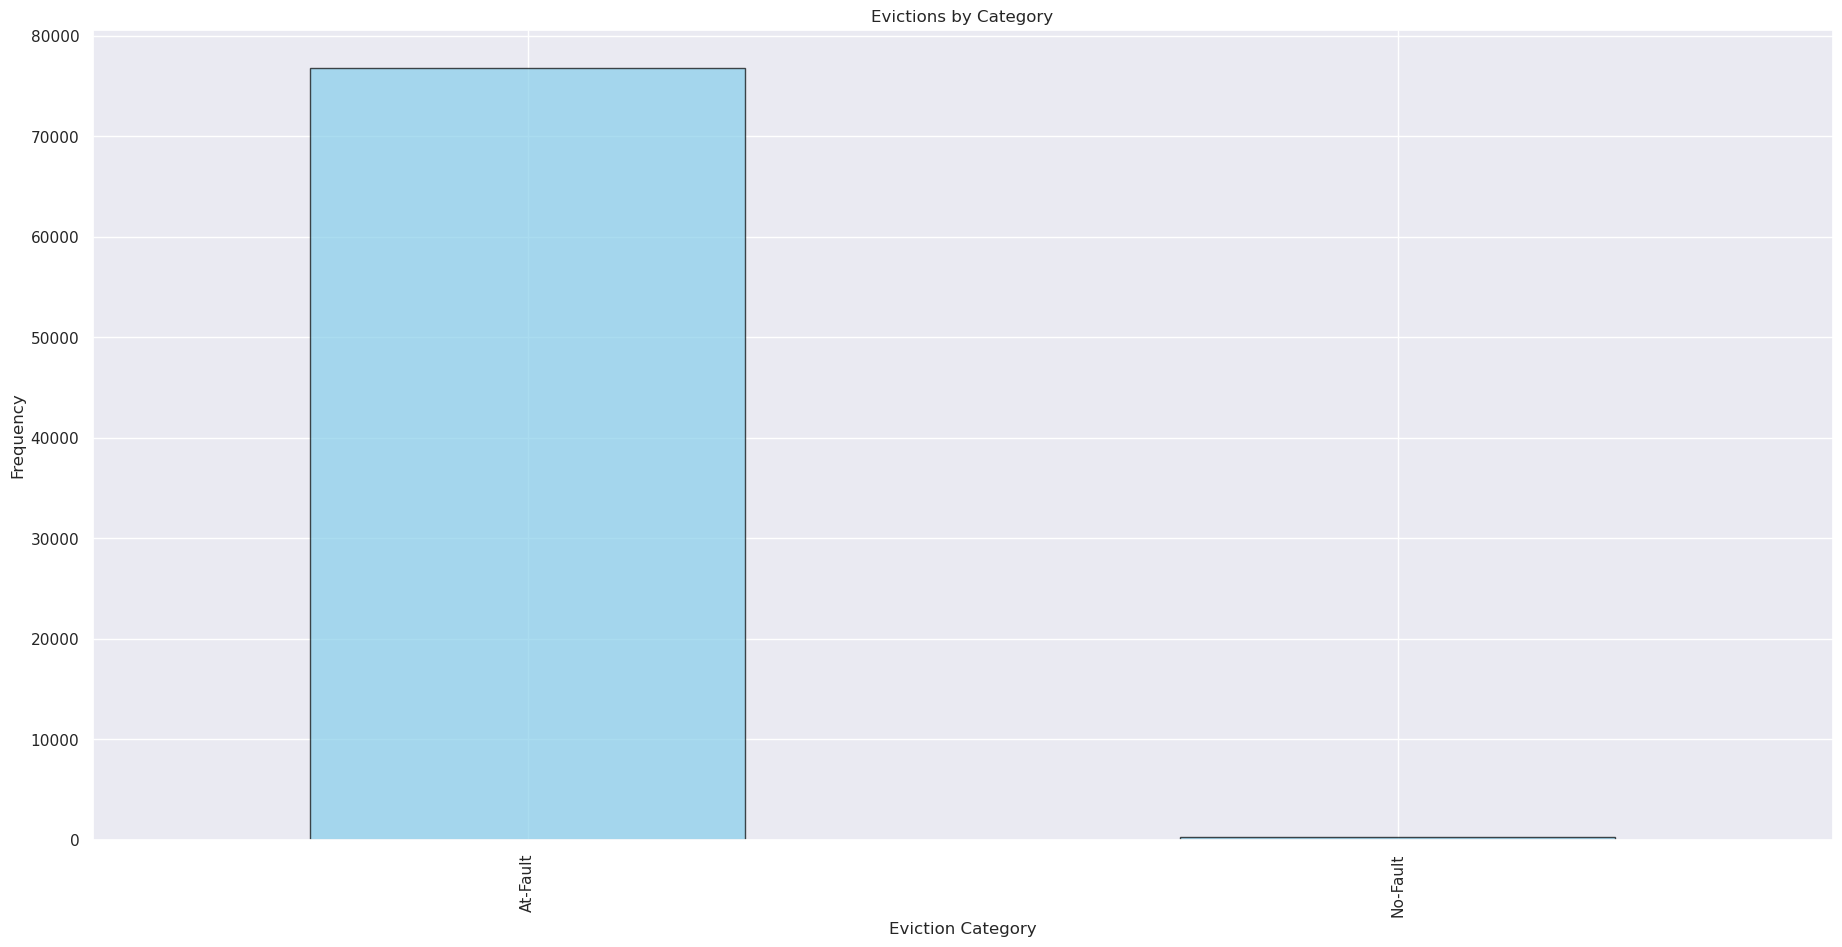

In [22]:
# City evictions Category
plt.figure(figsize=(20, 10))

# Plotting the bar chart
df_evictions['Eviction Category'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Eviction Category')
plt.ylabel('Frequency')
plt.title('Evictions by Category')

# Show the plot
plt.show()


## Analysis of Evictions by Notice Data and Type 
We notice this relationship and March to July months had the highest peaks for 3day notices compared to November and December

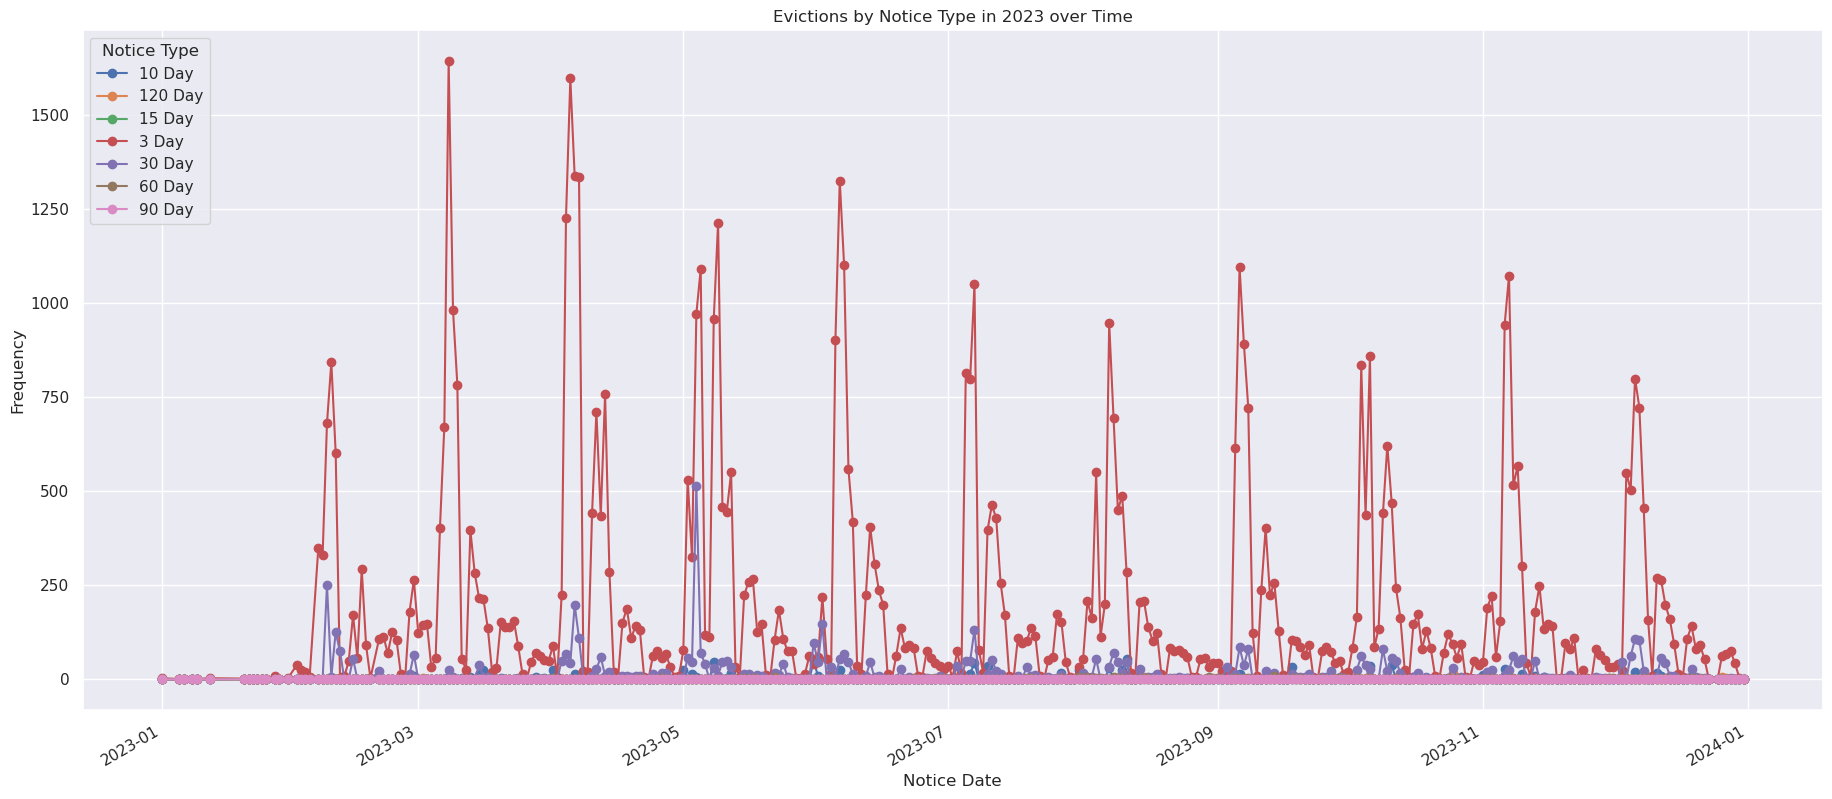

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Notice Date'
df_evictions['Notice Date'] = pd.to_datetime(df_evictions['Notice Date'])

# Filter data for the year 2023
df_2023 = df_evictions[df_evictions['Notice Date'].dt.year == 2023]

# Grouping by 'Notice Date' and counting the occurrences of each 'Notice Type'
notice_type_counts = df_2023.groupby(['Notice Date', 'Notice Type']).size().unstack().fillna(0)

# Plotting the line chart
notice_type_counts.plot(figsize=(20, 10), marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Notice Date')
plt.ylabel('Frequency')
plt.title('Evictions by Notice Type in 2023 over Time')

# Show the plot
plt.legend(title='Notice Type', loc='upper left')
plt.show()

## Analysis of Evictions by Notice type and City 
We see that Hollywood and Los Angeles received the most evictions that were 3day in nature

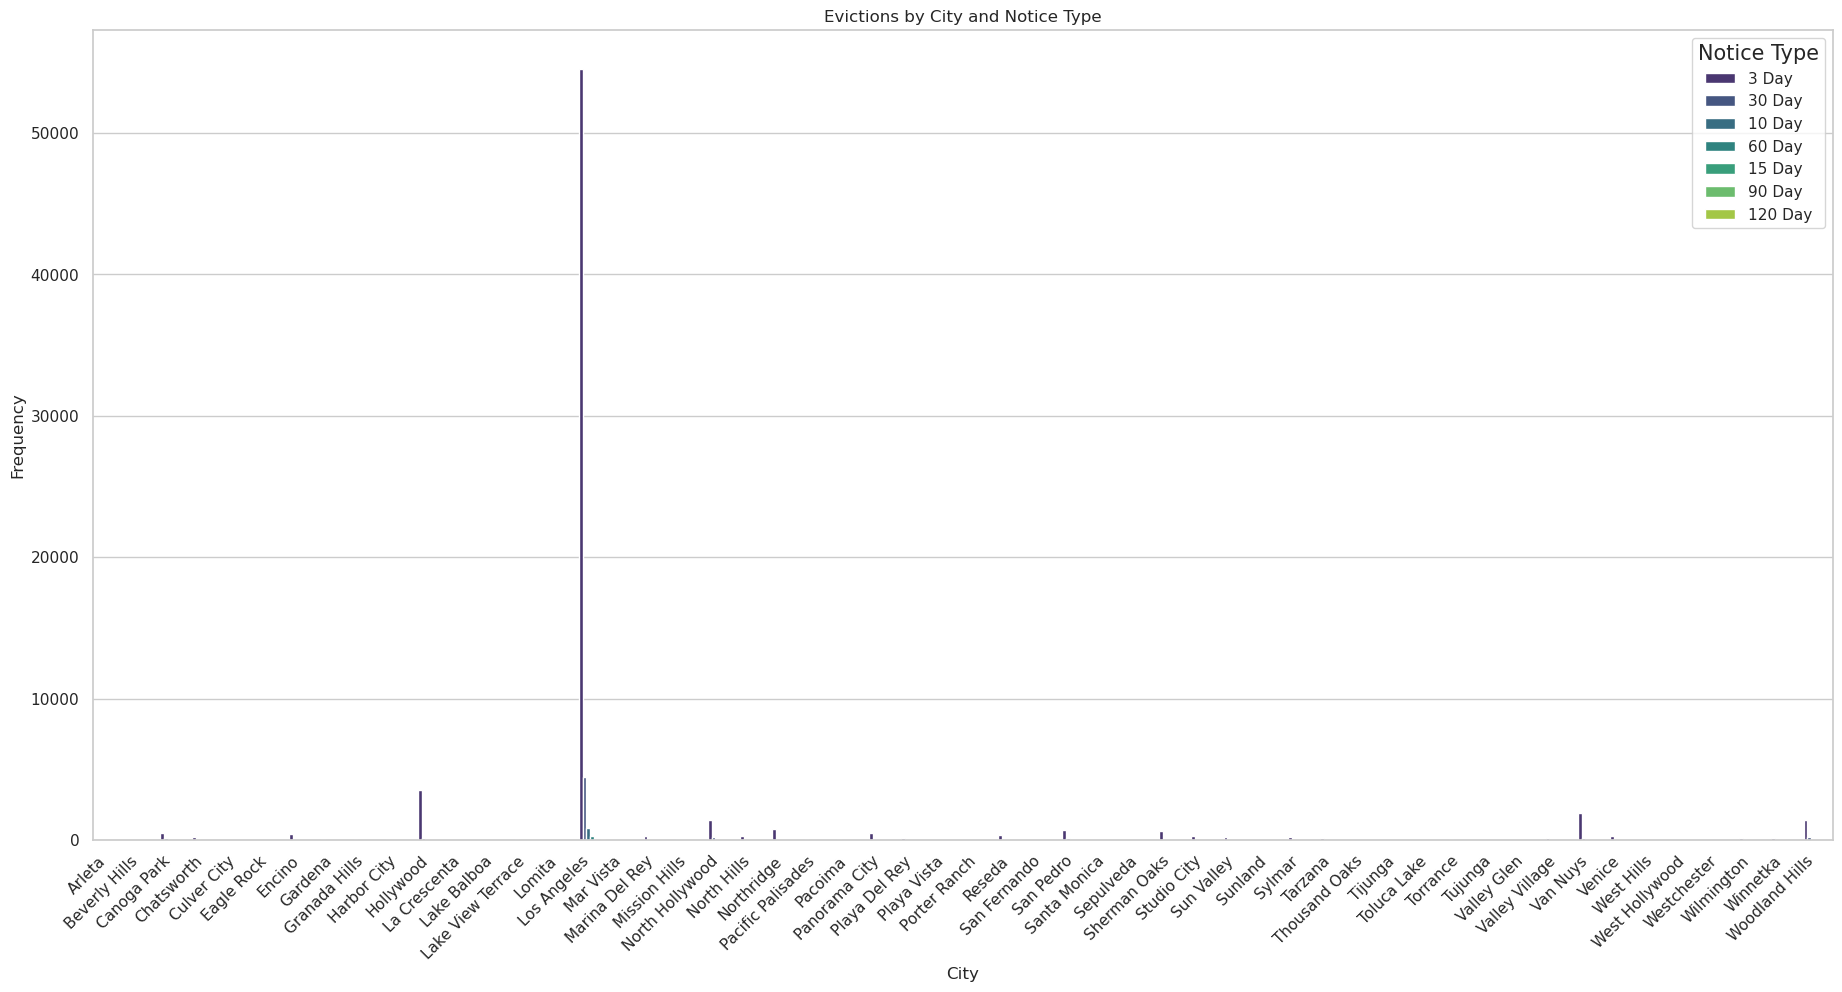

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(20, 10))
sns.countplot(x='City', hue='Notice Type', data=df_evictions, palette='viridis')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Evictions by City and Notice Type')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Notice Type', title_fontsize='15')
plt.show()


## Analysis of Evictions by Eviction Notice Type 
We see in percentages that about 90% of evictions were a 3day notice in the dataset 

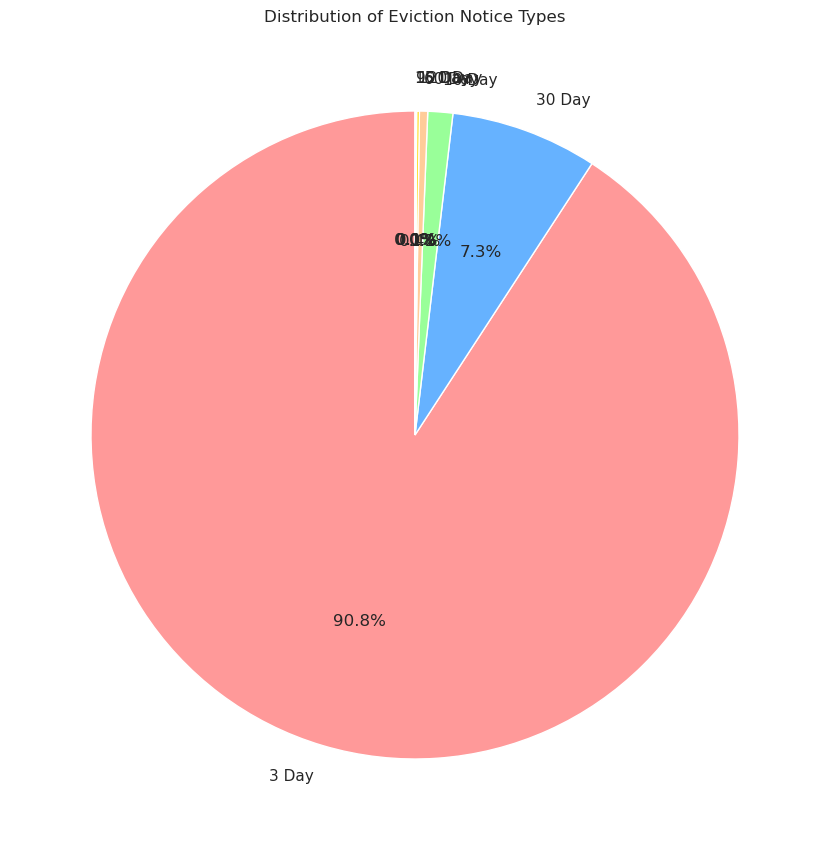

In [25]:
import matplotlib.pyplot as plt

# Get the value counts of Notice Type
notice_type_counts = df_evictions['Notice Type'].value_counts()

# Define brighter colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(notice_type_counts, labels=notice_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Adding title
plt.title('Distribution of Eviction Notice Types')

# Show the plot
plt.show()


## Analysis of Evictions by groupby Zip
We see that Los angeles zip 90028 had the most evictions in 2023

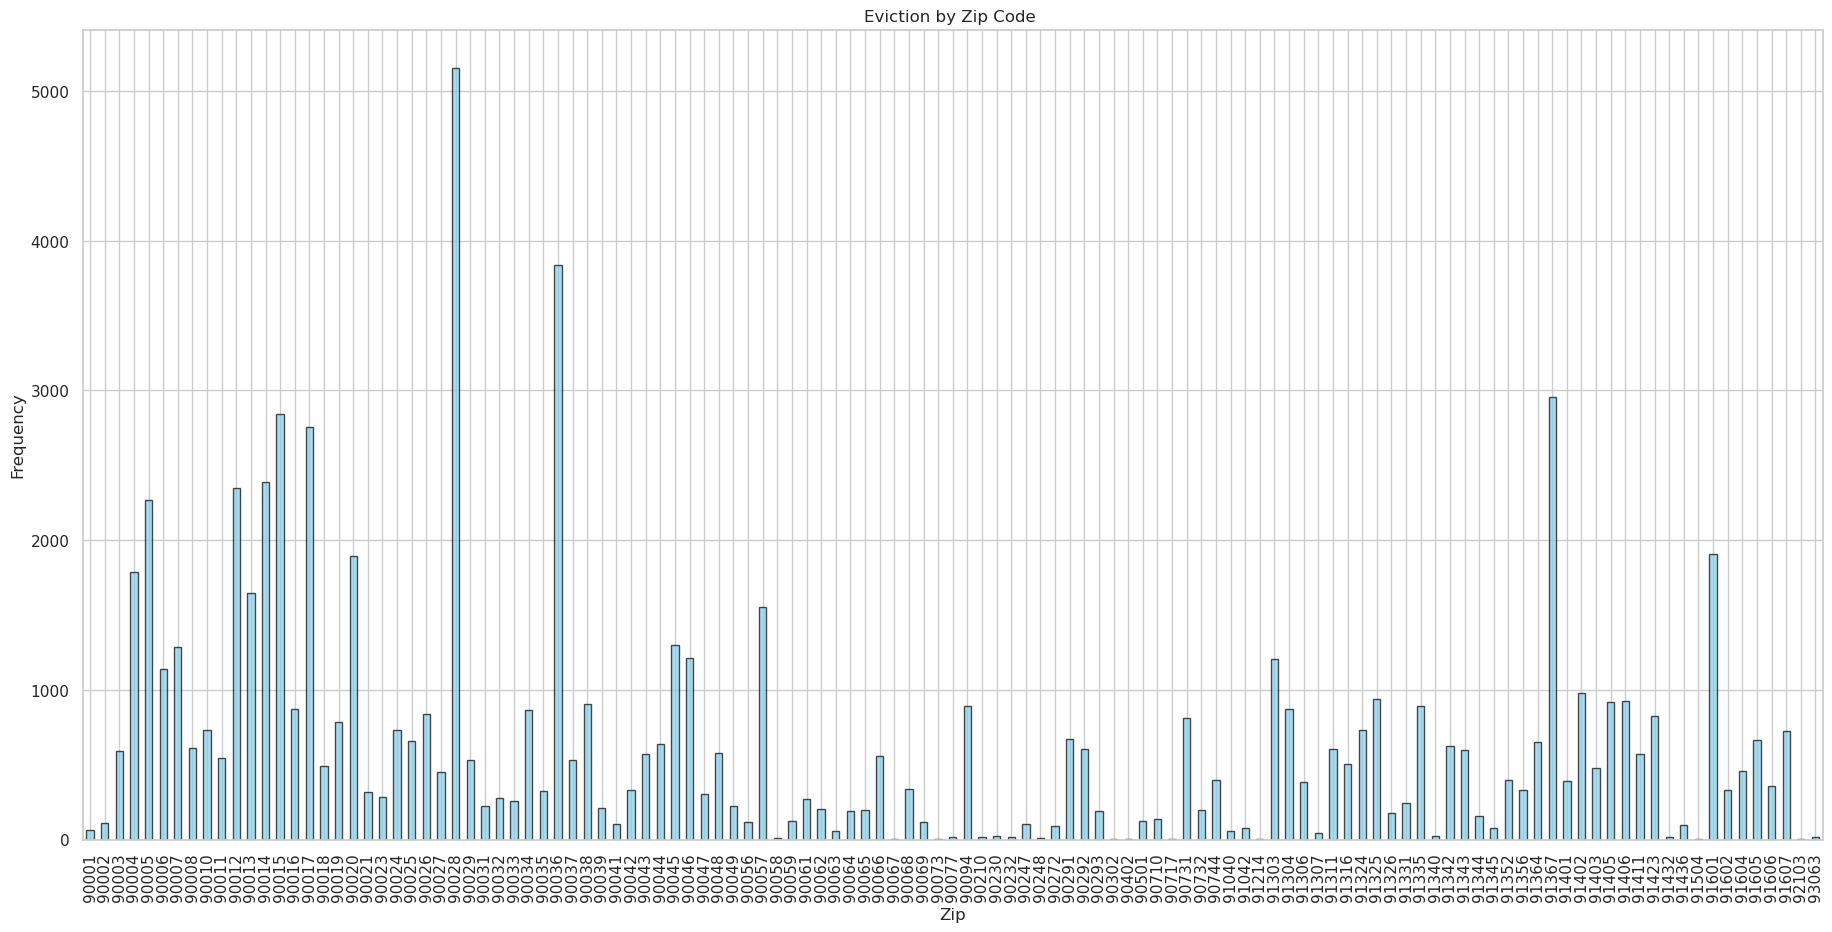

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Grouping by 'Eviction Category' and getting the count for each category
eviction_counts = df_evictions.groupby('Zip').size().sort_index()

# Plotting the bar chart
eviction_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Zip')
plt.ylabel('Frequency')
plt.title('Eviction by Zip Code ')

# Show the plot
plt.show()


## Analysis of Evictions by grouby City 
We see Los Angeles city recording the most evictions followed by Hollywood city  

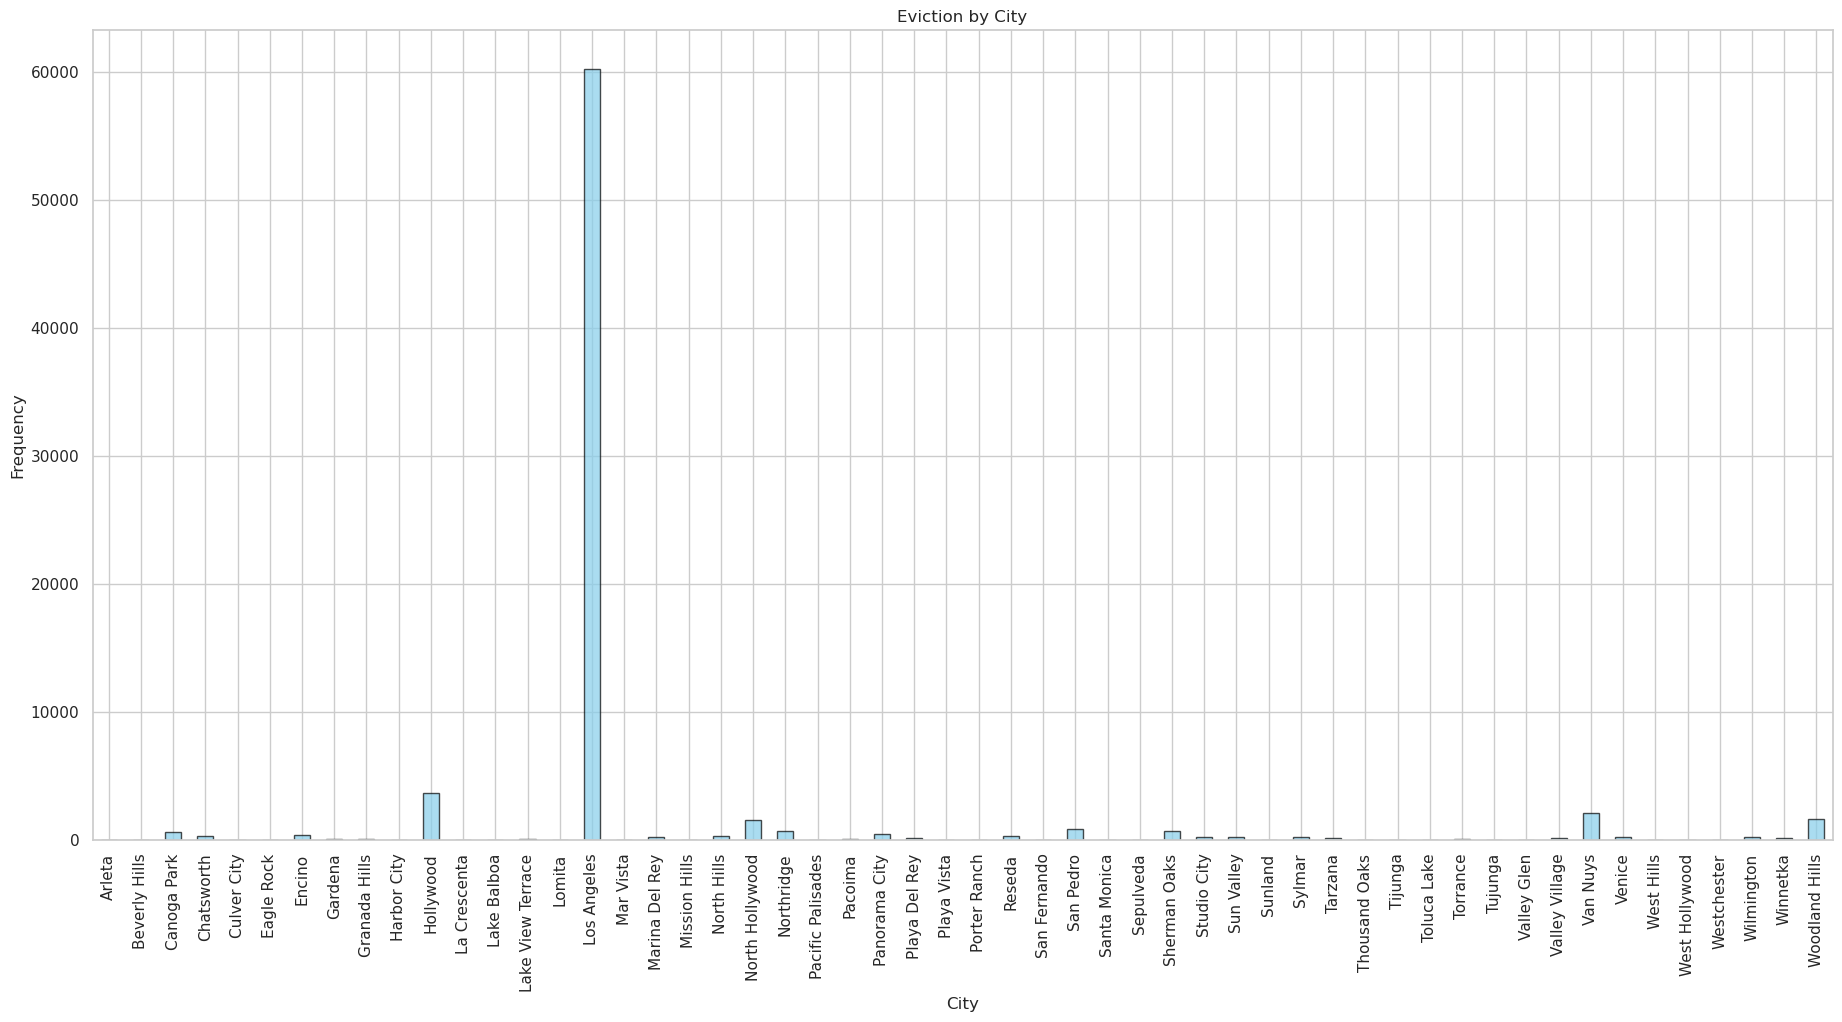

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Grouping by 'Eviction Category' and getting the count for each category
eviction_counts = df_evictions.groupby('City').size().sort_index()

# Plotting the bar chart
eviction_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Eviction by City')

# Show the plot
plt.show()

## Analysis of Evictions by Date Received 
We see March to May dates recorded highest numbers of evictions 

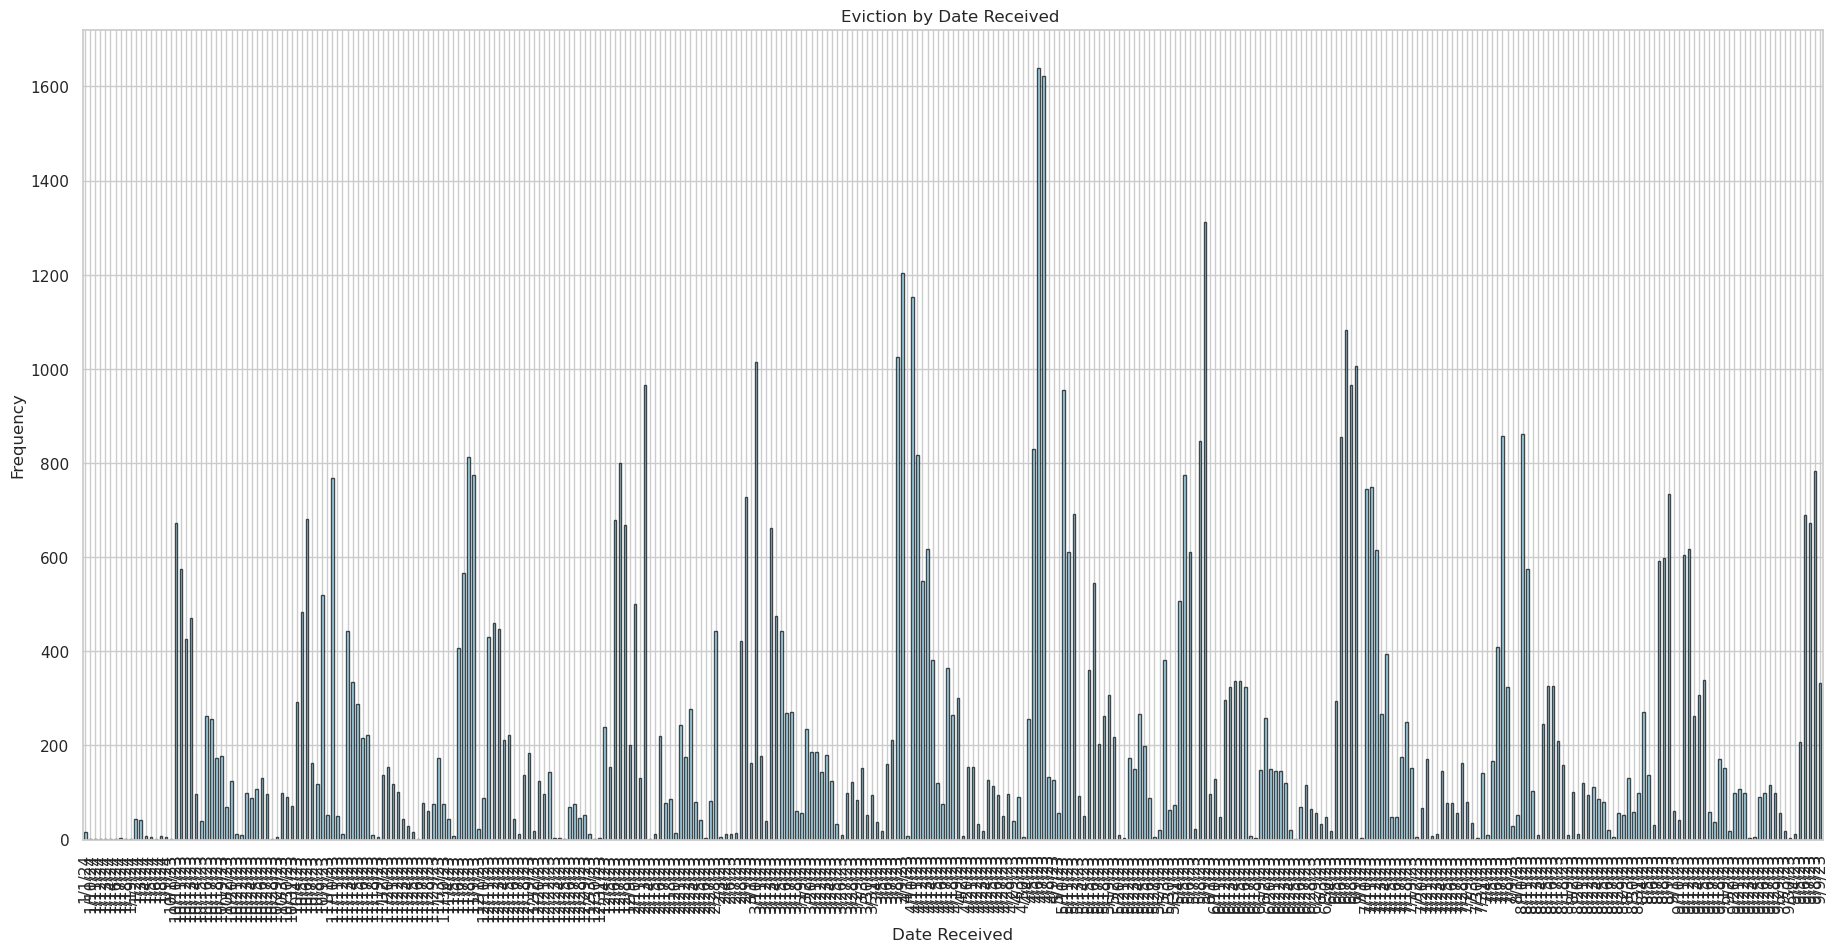

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Grouping by 'Eviction Category' and getting the count for each category
eviction_counts = df_evictions.groupby('Date Received').size().sort_index()

# Plotting the bar chart
eviction_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Date Received')
plt.ylabel('Frequency')
plt.title('Eviction by Date Received ')
# Show the plot
plt.show()

## Analysis of Evictions by Cause 
We see that Non Payment of Rent is the dominant reason leading to evictions

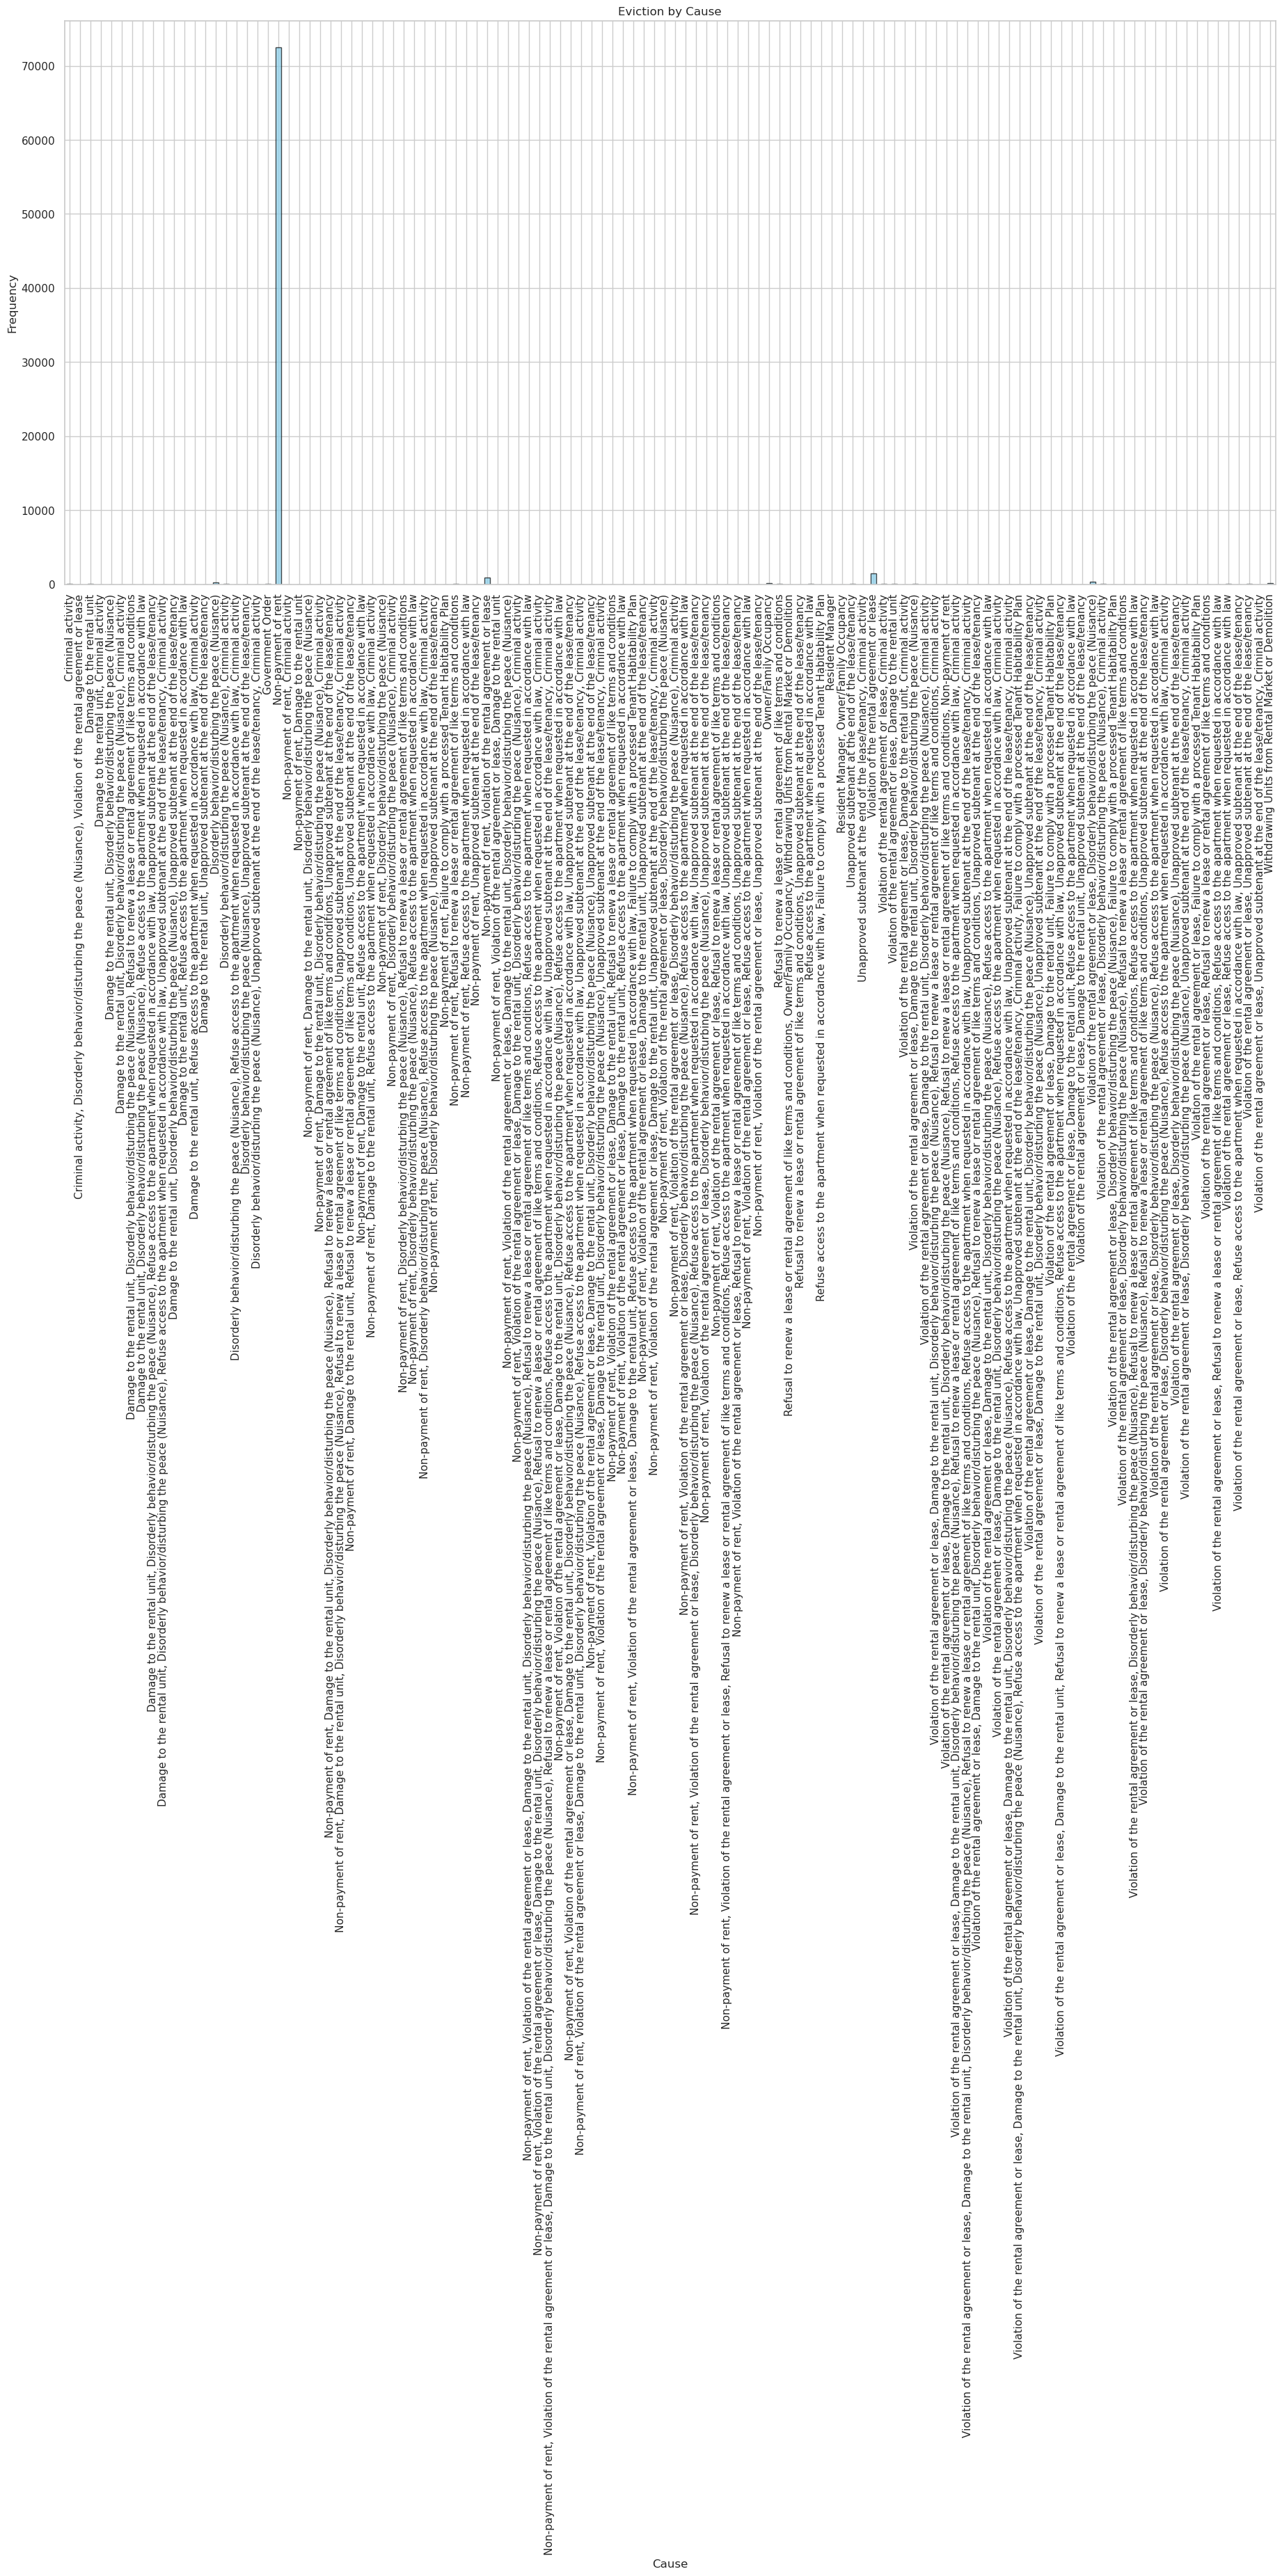

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Grouping by 'Eviction Category' and getting the count for each category
eviction_counts = df_evictions.groupby('Cause').size().sort_index()

# Plotting the bar chart
eviction_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Cause')
plt.ylabel('Frequency')
plt.title('Eviction by Cause')

# Show the plot
plt.show()

## Analysis of Evictions by groupby zip 

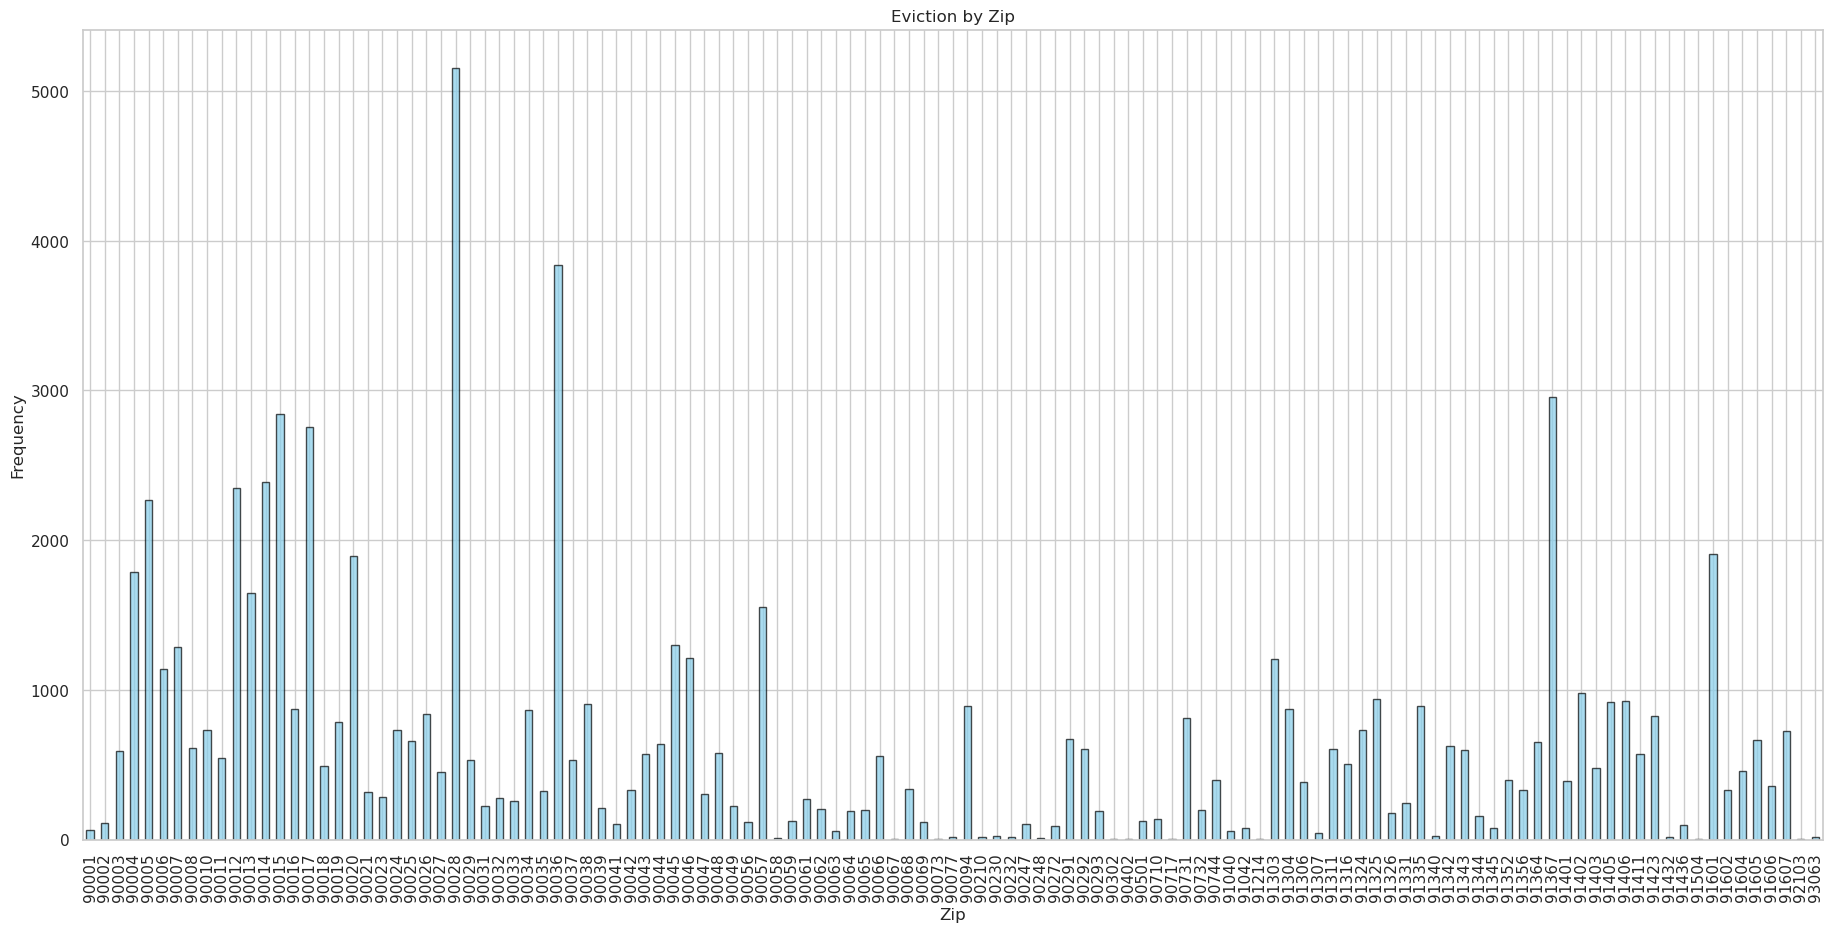

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Grouping by 'Eviction Category' and getting the count for each category
eviction_counts = df_evictions.groupby('Zip').size().sort_index()

# Plotting the bar chart
eviction_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Zip')
plt.ylabel('Frequency')
plt.title('Eviction by Zip')

# Show the plot
plt.show()

## Analysis of Evictions by Bedroom
We see that bedroom 1 had the most evictions followed by bedroom 2 status of accomodation. 

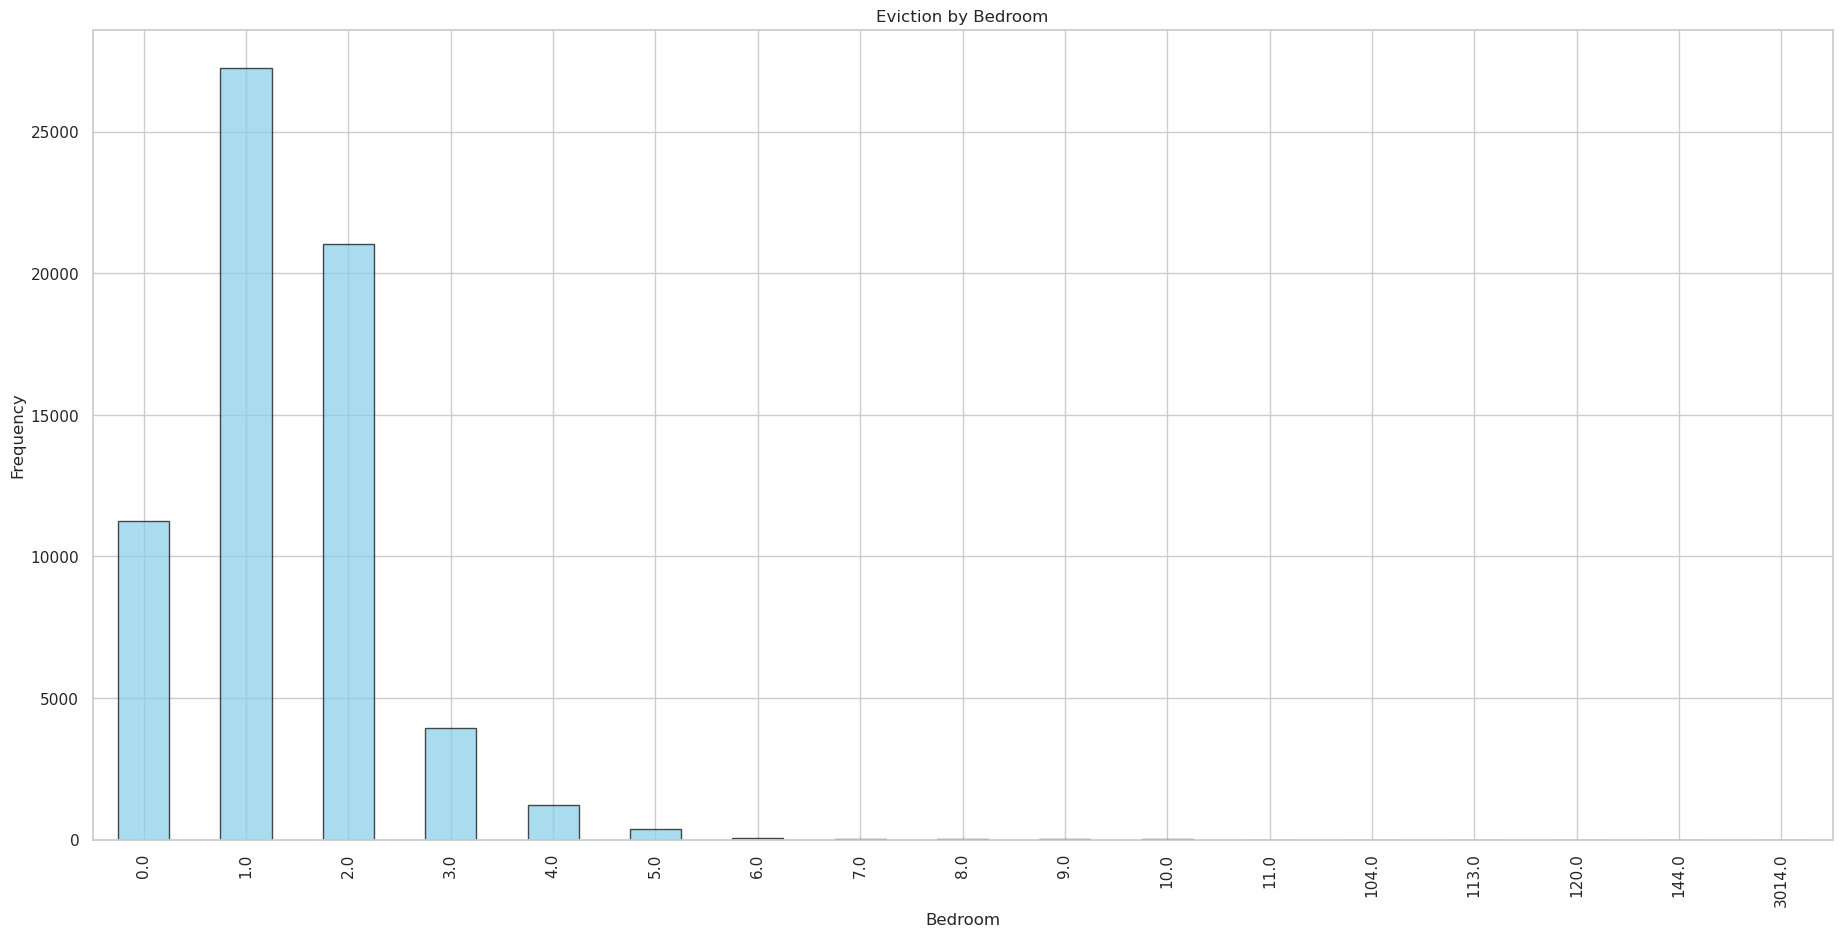

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Grouping by 'Eviction Category' and getting the count for each category
eviction_counts = df_evictions.groupby('Bedroom').size().sort_index()

# Plotting the bar chart
eviction_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.title('Eviction by Bedroom')

# Show the plot
plt.show()

# LA_COUNTY_ZIP codes dataset to merge 
We load the dataset 

In [35]:
import geopandas as gpd
# read in a geojson file downloaded from LA city we create new geoframe 
df_geojson=gpd.read_file('LA_County_ZIP_Codes.geojson')
df_geojson.head(3)

,OBJECTID,ZIPCODE,Shape_Length,Shape_Area,geometry
0,1,90001,48677.278478,9.556340e+07,"POLYGON ((-118.24338 33.98924, -118.24348 33.9..."
1,2,90002,44972.017035,8.275222e+07,"POLYGON ((-118.23431 33.96101, -118.23442 33.9..."
2,3,90003,63303.481758,1.026431e+08,"POLYGON ((-118.28285 33.97597, -118.28285 33.9..."


<Axes: >

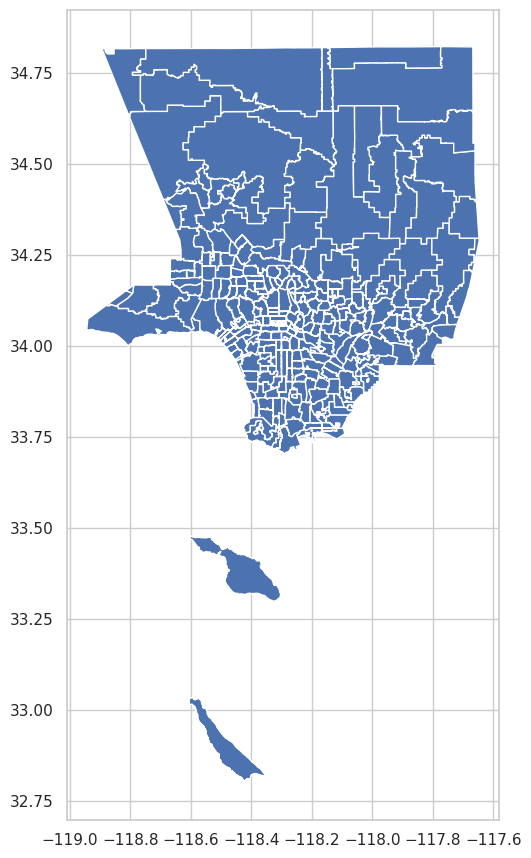

In [36]:
# plot it!
df_geojson.plot(figsize=(12,10))

In [37]:
# tell me more about this dataset
df_geojson.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      313 non-null    int64   
 1   ZIPCODE       313 non-null    object  
 2   Shape_Length  313 non-null    float64 
 3   Shape_Area    313 non-null    float64 
 4   geometry      313 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 12.4+ KB


In [38]:
# axis = 0 drops rows axis = 1 drops columns with null
df_geojson = df_geojson .dropna(axis=1,how="all")

In [40]:
# we only really need FIPS and geometry, so let's subset the data
df_geojson = df_geojson[['ZIPCODE','geometry']]
df_geojson.head(3)

,ZIPCODE,geometry
0,90001,"POLYGON ((-118.24338 33.98924, -118.24348 33.9..."
1,90002,"POLYGON ((-118.23431 33.96101, -118.23442 33.9..."
2,90003,"POLYGON ((-118.28285 33.97597, -118.28285 33.9..."


## Rename the key column in LA County ZIP Codes 
We rename the zipcode to Zip 

In [45]:
import pandas as pd

# Assuming your DataFrame is named df_geojson
df_geojson.rename(columns={'ZIPCODE': 'Zip'}, inplace=True)

# Print the DataFrame to verify the changes
print(df_geojson.head(3))

     Zip                                           geometry
0  90001  POLYGON ((-118.24338 33.98924, -118.24348 33.9...
1  90002  POLYGON ((-118.23431 33.96101, -118.23442 33.9...
2  90003  POLYGON ((-118.28285 33.97597, -118.28285 33.9...


In [47]:
df_geojson.head(3)

,Zip,geometry
0,90001,"POLYGON ((-118.24338 33.98924, -118.24348 33.9..."
1,90002,"POLYGON ((-118.23431 33.96101, -118.23442 33.9..."
2,90003,"POLYGON ((-118.28285 33.97597, -118.28285 33.9..."


## We Merge two datasets df_evictions and df_geojson

In [49]:
import pandas as pd

# Assuming the first DataFrame is df_evictions and the second DataFrame is df_geojson

# Convert the 'Zip' column in df_evictions to the same data type as 'ZIPCODE'
df_evictions['Zip'] = df_evictions['Zip'].astype(str)

# Merge the two DataFrames on the 'Zip' and 'ZIPCODE' columns
merged_df = pd.merge(df_evictions, df_geojson, left_on='Zip', right_on='Zip')

# Print the merged DataFrame
print(merged_df.head(3))

  Notice Date Date Received Eviction Category                Cause  \
0  2023-02-09       2/21/23          At-Fault  Non-payment of rent   
1  2023-02-09       2/21/23          At-Fault  Non-payment of rent   
2  2023-02-09       2/21/23          At-Fault  Non-payment of rent   

           Address    City    Zip  Bedroom Notice Type         Apn  \
0  14125 Garber St  Arleta  91331      NaN       3 Day  2642002018   
1  14101 Garber St  Arleta  91331      NaN       3 Day  2642002014   
2    14249 Hoyt St  Arleta  91331      NaN       3 Day  2644002011   

   Council District    Rent Owed  \
0                 6  $12,701.70    
1                 6  $17,886.60    
2                 6   $6,218.17    

                                            geometry  
0  POLYGON ((-118.41132 34.28969, -118.41130 34.2...  
1  POLYGON ((-118.41132 34.28969, -118.41130 34.2...  
2  POLYGON ((-118.41132 34.28969, -118.41130 34.2...  


In [50]:
# what does it look like now?
merged_df.head(3)

,Notice Date,Date Received,Eviction Category,Cause,Address,City,Zip,Bedroom,Notice Type,Apn,Council District,Rent Owed,geometry
0,2023-02-09,2/21/23,At-Fault,Non-payment of rent,14125 Garber St,Arleta,91331,NaN,3 Day,2642002018,6,"$12,701.70","POLYGON ((-118.41132 34.28969, -118.41130 34.2..."
1,2023-02-09,2/21/23,At-Fault,Non-payment of rent,14101 Garber St,Arleta,91331,NaN,3 Day,2642002014,6,"$17,886.60","POLYGON ((-118.41132 34.28969, -118.41130 34.2..."
2,2023-02-09,2/21/23,At-Fault,Non-payment of rent,14249 Hoyt St,Arleta,91331,NaN,3 Day,2644002011,6,"$6,218.17","POLYGON ((-118.41132 34.28969, -118.41130 34.2..."


In [51]:
merged_df['Zip'] = merged_df['Zip'].astype(float)  # Change 'float' to the appropriate numeric type

In [52]:
merged_df = merged_df.dropna(subset=['Zip'])

# Zip-Venture into Folium choropleth maps and interactive maps
LA and Hollywood zip codes have darker shade showing higher eviction rates based on the meter or legend bar

In [ ]:
# save our data to offload the mapping into another notebook
# for example: merged_df.to_csv('Zip-Venture-merged-df.csv')
# and in new notebook: merged_df = df.read_csv('Zip-Venture-merged-df.csv')

In [2]:
import folium 

m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=df_geojson, # geo data
                  data=merged_df, # data          
                  key_on='feature.properties.Zip', # key, or merge column
                  columns=['geometry', 'Zip'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Eviction (2023)').add_to(m)    # name on the legend color bar
#m

NameError: name 'df_geojson' is not defined

In [1]:
import folium

m = folium.Map(location=[34.2, -118.2],
               zoom_start=9,
               tiles='CartoDB positron',
               attribution='CartoDB')

# plot choropleth over the base map
folium.Choropleth(
    geo_data=df_geojson,  # geo data
    data=merged_df,  # data
    key_on='feature.properties.Zip',  # key, or merge column
    columns=['geometry', 'Zip'],  # [key, value]
    fill_color='PuBu',  # Use PuBu color scheme
    line_weight=0.1,
    fill_opacity=1.0,  # Set fill opacity to 1 (no transparency)
    line_opacity=0.2,  # line opacity (of the border)
    legend_name='Eviction (2023)'
).add_to(m)  # name on the legend color bar

# Display the map
#m

NameError: name 'df_geojson' is not defined

In [55]:
m.save('LA_Evictions.html')

In [5]:
import folium

# Create a folium map
m = folium.Map(location=[34.2, -118.2], zoom_start=9, tiles='CartoDB positron', attribution='CartoDB')

# Plot choropleth over the base map
folium.Choropleth(
    geo_data=df_geojson,  # GeoJSON data
    data=merged_df,  # DataFrame
    key_on='feature.properties.Zip',  # Key or merge column
    columns=['geometry', 'Zip'],  # [key, value]
    fill_color='BuPu',
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2,  # Line opacity (of the border)
    legend_name='Eviction (2023)',
    highlight=True  # Enable highlight
).add_to(m)

# Add boundary color to each feature
folium.GeoJson(
    df_geojson,
    style_function=lambda feature: {
        'color': 'blue',  # Set the boundary color
        'weight': 1,
        'fillOpacity': 0  # Make the polygons transparent to highlight only the boundaries
    }
).add_to(m)

# Display the map
#m

NameError: name 'df_geojson' is not defined

# CITIES GEOJSON ANALYSIS AND MERGE WITH EVICTIONS DATASET
We load the datasets and take a peak inside

In [3]:
import geopandas as gpd
# read in a geojson file downloaded from the LA Times we create new geoframe 
df_citygeojson=gpd.read_file('City_Boundaries_Lines.geojson')
df_citygeojson.head(3)

,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,created_user,created_date,last_edited_user,ShapeSTArea,ShapeSTLength,geometry
0,366,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-19 17:08:28+00:00,None,NaT,None,1.097324e+05,5448.776853,"POLYGON ((-118.11852 33.74279, -118.11856 33.7..."
1,367,Redondo Beach,Redondo Beach,RBCH,6.349,City,Water,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-19 17:08:28+00:00,None,NaT,None,4.883225e+06,21127.481570,"POLYGON ((-118.39236 33.84190, -118.39240 33.8..."
2,369,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-19 17:08:28+00:00,None,NaT,None,5.749229e+05,28835.807961,"POLYGON ((-118.21062 33.72181, -118.21058 33.7..."


<Axes: >

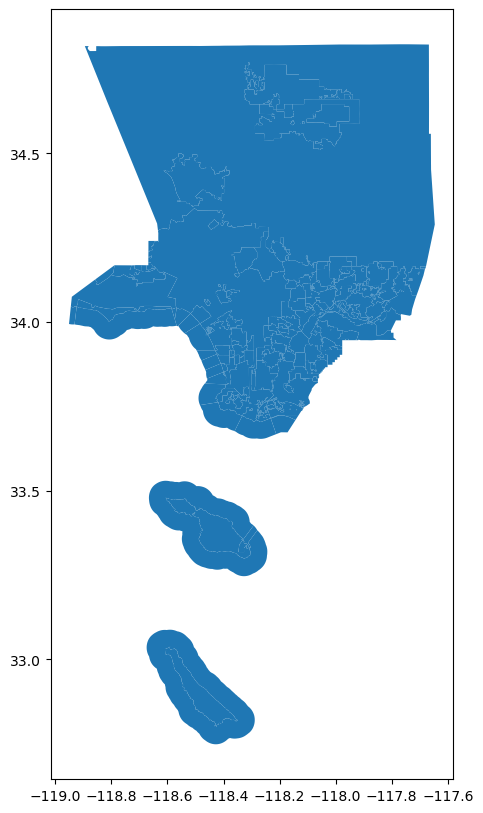

In [4]:
# plot it!
df_citygeojson.plot(figsize=(12,10))

In [5]:
# tell me more about this dataset
df_citygeojson.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   OBJECTID          365 non-null    int64              
 1   CITY_NAME         365 non-null    object             
 2   CITY_LABEL        365 non-null    object             
 3   ABBR              365 non-null    object             
 4   OF_AREA_SM        365 non-null    float64            
 5   CITY_TYPE         365 non-null    object             
 6   FEAT_TYPE         365 non-null    object             
 7   COLOR_EGIS        365 non-null    object             
 8   URL               365 non-null    object             
 9   PHONE             365 non-null    object             
 10  last_edited_date  365 non-null    datetime64[ns, UTC]
 11  created_user      2 non-null      object             
 12  created_date      2 non-null      datetime64[ns, UTC]
 1

In [6]:
# axis = 0 drops rows axis = 1 drops columns with null
df_citygeojson = df_citygeojson.dropna(axis=1,how="all")

In [7]:
df_citygeojson.head(3)

,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,created_user,created_date,last_edited_user,ShapeSTArea,ShapeSTLength,geometry
0,366,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-19 17:08:28+00:00,None,NaT,None,1.097324e+05,5448.776853,"POLYGON ((-118.11852 33.74279, -118.11856 33.7..."
1,367,Redondo Beach,Redondo Beach,RBCH,6.349,City,Water,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-19 17:08:28+00:00,None,NaT,None,4.883225e+06,21127.481570,"POLYGON ((-118.39236 33.84190, -118.39240 33.8..."
2,369,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-19 17:08:28+00:00,None,NaT,None,5.749229e+05,28835.807961,"POLYGON ((-118.21062 33.72181, -118.21058 33.7..."


In [8]:
import pandas as pd

# Assuming your DataFrame is named df_geojson
df_citygeojson.rename(columns={'CITY_NAME': 'City'}, inplace=True)

# Print the DataFrame to verify the changes
print(df_citygeojson.head(3))

   OBJECTID           City     CITY_LABEL  ABBR  OF_AREA_SM CITY_TYPE  \
0       366     Long Beach     Long Beach    LB      50.309      City   
1       367  Redondo Beach  Redondo Beach  RBCH       6.349      City   
2       369     Long Beach     Long Beach    LB      50.309      City   

    FEAT_TYPE                COLOR_EGIS                URL       PHONE  \
0  Breakwater  Purple - RGB 185,185,250  www.longbeach.gov  5625706555   
1       Water    Pink - RGB 255,190,232    www.redondo.org  3103721171   
2  Breakwater  Purple - RGB 185,185,250  www.longbeach.gov  5625706555   

           last_edited_date created_user created_date last_edited_user  \
0 2022-07-19 17:08:28+00:00         None          NaT             None   
1 2022-07-19 17:08:28+00:00         None          NaT             None   
2 2022-07-19 17:08:28+00:00         None          NaT             None   

    ShapeSTArea  ShapeSTLength  \
0  1.097324e+05    5448.776853   
1  4.883225e+06   21127.481570   
2  5.749229

## Merge two dataset df_evictions and df_citygeojson

In [9]:
# we only really need City and geometry, so let's subset the data
df_citygeojson = df_citygeojson[['City','geometry']]
df_citygeojson.head(3)

,City,geometry
0,Long Beach,"POLYGON ((-118.11852 33.74279, -118.11856 33.7..."
1,Redondo Beach,"POLYGON ((-118.39236 33.84190, -118.39240 33.8..."
2,Long Beach,"POLYGON ((-118.21062 33.72181, -118.21058 33.7..."


In [13]:
# Subset the 'City' and 'geometry' columns from df_citygeojson
df_citygeojson_subset = df_citygeojson[['City', 'geometry']]

# Merge df_evictions with df_citygeojson_subset
merged_df_evictions = pd.merge(df_evictions, df_citygeojson_subset, on='City', how='left')

# Print the merged DataFrame
print(merged_df_evictions.head(3))

  Notice Date Date Received Eviction Category                Cause  \
0      2/9/23       2/21/23          At-Fault  Non-payment of rent   
1      2/9/23       2/21/23          At-Fault  Non-payment of rent   
2      2/9/23       2/21/23          At-Fault  Non-payment of rent   

           Address    City    Zip  Bedroom Notice Type         Apn  \
0  14125 Garber St  Arleta  91331      NaN       3 Day  2642002018   
1  14101 Garber St  Arleta  91331      NaN       3 Day  2642002014   
2    14249 Hoyt St  Arleta  91331      NaN       3 Day  2644002011   

   Council District    Rent Owed geometry  
0                 6  $12,701.70      None  
1                 6  $17,886.60      None  
2                 6   $6,218.17      None  


LA City shows high numbers in eviction values on our map below

In [3]:
import folium
from folium import Choropleth, GeoJson

# Create a folium map
m = folium.Map(location=[34.2, -118.2], zoom_start=9, tiles='CartoDB positron', attribution='CartoDB')

# Calculate value counts for each city
eviction_counts = merged_df_evictions['City'].value_counts().reset_index()
eviction_counts.columns = ['City', 'Eviction_Count']

# Plot choropleth over the base map
Choropleth(
    geo_data=df_citygeojson,  # GeoJSON data
    data=eviction_counts,  # DataFrame with value counts
    key_on='feature.properties.City',  # Key or merge column
    columns=['City', 'Eviction_Count'],  # [key, value]
    fill_color='YlGnBu',
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2,  # Line opacity (of the border)
    legend_name='Eviction Counts (2023)',
    highlight=True  # Enable highlight
).add_to(m)

# Add boundary color to each feature
GeoJson(
    df_citygeojson,
    style_function=lambda feature: {
        'color': 'blue',  # Set the boundary color
        'weight': 1,
        'fillOpacity': 0  # Make the polygons transparent to highlight only the boundaries
    },
    tooltip=folium.features.GeoJsonTooltip(fields=['City'], labels=False),
    popup=folium.features.GeoJsonPopup(fields=['City'], labels=False),
).add_to(m)

# Display the map
#m


NameError: name 'merged_df_evictions' is not defined

In [15]:
m.save('LA-cityevictionszone.html')